**Description about the Dataset**

This dataset contains the nutrition info for Starbucks menu items.

The 'Beverage_category' column classifies the type of beverage, such as coffee, tea, or smoothie. The 'Beverage' column provides the specific name of the drink, for instance, Caramel Macchiato or Green Tea Latte.

The 'Beverage_prep' column details the preparation method of the beverage, including whether it's served hot or cold, and any additional ingredients or toppings like whipped cream or syrup. The 'Calories' column lists the total caloric content of each beverage, providing insight into the energy provided by each drink.

The next three columns, 'Total Fat (g)', 'Trans Fat (g)', and 'Saturated Fat (g)', provide a breakdown of the fat content in each beverage. These columns are crucial for those monitoring their fat intake for health or dietary reasons. The 'Sodium (mg)' column indicates the amount of sodium in each beverage, which is essential information for individuals on low-sodium diets.

The 'Total Carbohydrates (g)' column provides the total carbohydrate content, including sugars, which is particularly useful for people managing diabetes or following a low-carb diet. Lastly, the 'Cholesterol (mg)' column lists the amount of cholesterol in each beverage, a critical factor for those monitoring their cholesterol levels.

This dataset serves as a comprehensive guide to the nutritional content of Starbucks beverages, making it a valuable resource for researchers, dietitians, and health-conscious consumers.

**Questions to be inferenced at the end -**

1. What is the question?

2. What did you do?

3. How well did it work?

4. What did you learn?

# **ML data cleaning and feature selection**

#  What are the data types? (Only numeric and categorical)


## Numeric Types: -  

##### **int64**: Calories, Sodium (mg), Total Carbohydrates (g), Cholesterol (mg), Dietary Fibre (g), Sugars (g), float64: Trans Fat (g), Saturated Fat (g), Protein (g)

##### **Categorical Types (object)**:  object: Beverage_category, Beverage, Beverage_prep, Total Fat (g), Vitamin A (% DV), Vitamin C (% DV), Calcium (% DV), Iron (% DV), Caffeine (mg)

##### Some columns that appear to be categorical (like Total Fat (g), Vitamin A (% DV), etc.) are actually numeric in nature but are labeled as object due to the presence of non-numeric characters or missing values that are treated as strings.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
## data = pd.read_csv('C:\\Users\\Pranav\\Downloads\\archive (5)\\your_file.csv')

In [2]:
data = pd.read_csv('starbucks.csv')

In [3]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   
1                         10                 0                   0   
2                         10                 0                   0   
3                         10                 0                   0   
4                         75                10                   0   

    Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0            0            0.3                0%               0%   
1            0            0.5                0%               0%   
2            0            1.0                0%               0%   
3            0            1.0                0%               0%   
4            9            6.0               10%               0%   

   Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
0               0%           0%           175  
1               0%           0%           260  
2               0%           0%           330  
3               2%           0%           410  
4              20%           0%            75

# Are there missing values?

In [4]:
data.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

In [7]:
data

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
236  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
237  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   \
0                 Short         3            0.1             0.0   
1                  Tall         4            0.1             0.0   
2                Grande         5            0.1             0.0   
3                 Venti         5            0.1             0.0   
4     Short Nonfat Milk        70            0.1             0.1   
..                  ...       ...            ...             ...   
236             Soymilk       320            3 2             0.4   
237    Tall Nonfat Milk       170            0.1             0.1   
238          Whole Milk       200            3.5             2.0   
239             Soymilk       180            1.5             0.2   
240  Grande Nonfat Milk       240            0.1             0.1   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0                  0.0             0                          5   
1                  0.0             0                         10   
2                  0.0             0                         10   
3                  0.0             0                         10   
4                  0.0             5                         75   
..                 ...           ...                        ...   
236                0.0             0                        250   
237                0.0             0                        160   
238                0.1            10                        160   
239                0.0             0                        160   
240                0.0             5                        230   

     Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
0                   0                   0            0            0.3   
1                   0                   0            0            0.5   
2                   0                   0            0            1.0   
3                   0                   0            0            1.0   
4                  10                   0            9            6.0   
..                ...                 ...          ...            ...   
236                67                   1           64            5.0   
237                39                   0           38            4.0   
238                39                   0           38            3.0   
239                37                   1           35            3.0   
240                56                   0           55            5.0   

    Vitamin A (% DV)  Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)   \
0                  0%               0%               0%           0%   
1                  0%               0%               0%           0%   
2                  0%               0%               0%           0%   
3                  0%               0%               2%           0%   
4                 10%               0%              20%           0%   
..                ...              ...              ...          ...   
236                6%               8%

In [8]:
data_cleaned = data

In [9]:
data_cleaned.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

# What are the likely distributions of the numeric variables?

In [10]:
pip install statsmodels

<Figure size 800x500 with 0 Axes>

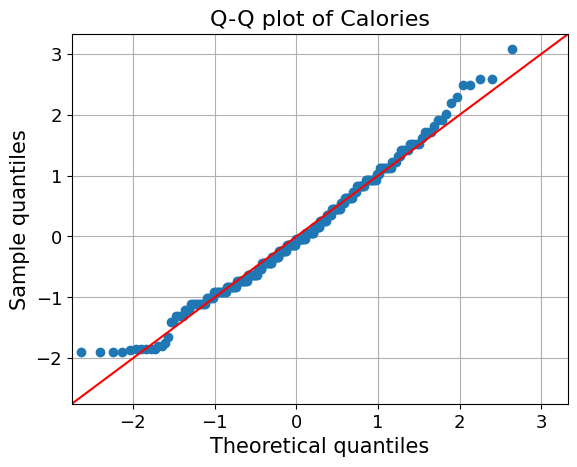

<Figure size 800x500 with 0 Axes>

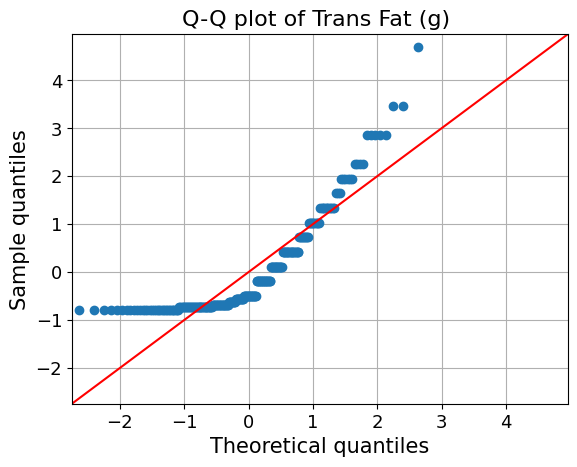

<Figure size 800x500 with 0 Axes>

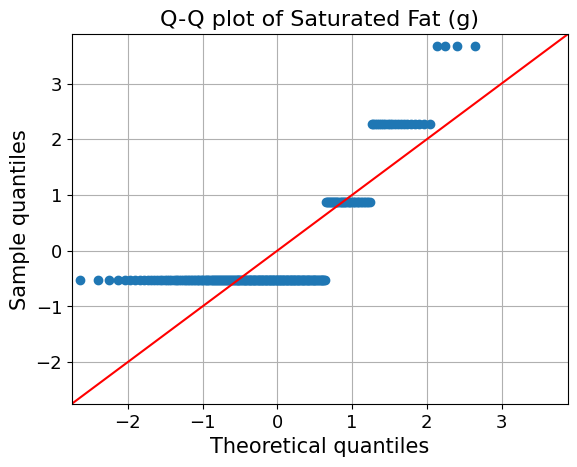

<Figure size 800x500 with 0 Axes>

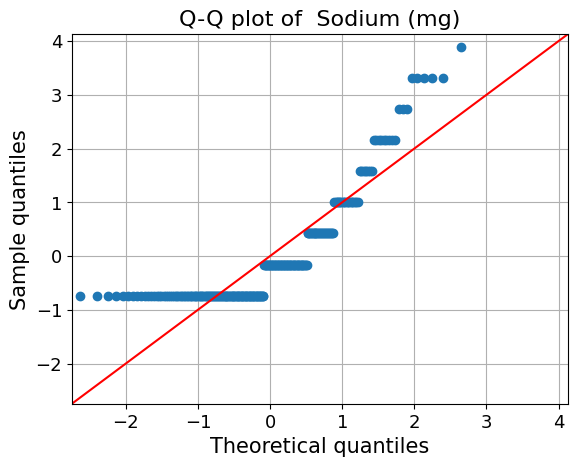

<Figure size 800x500 with 0 Axes>

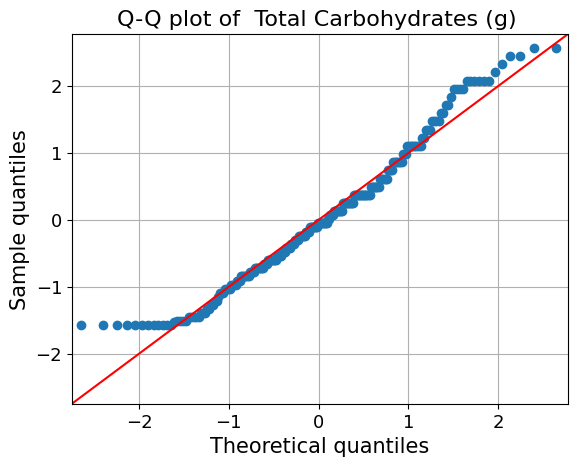

<Figure size 800x500 with 0 Axes>

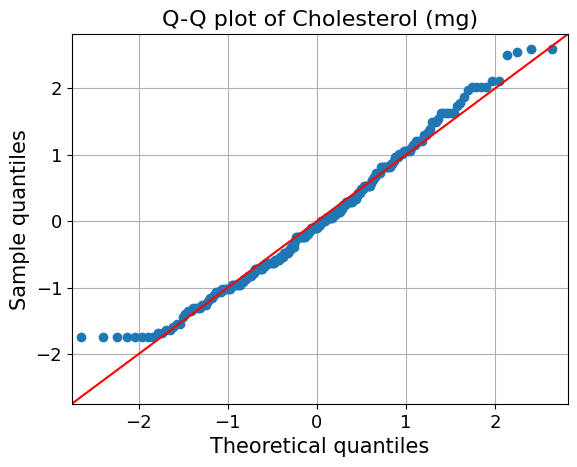

<Figure size 800x500 with 0 Axes>

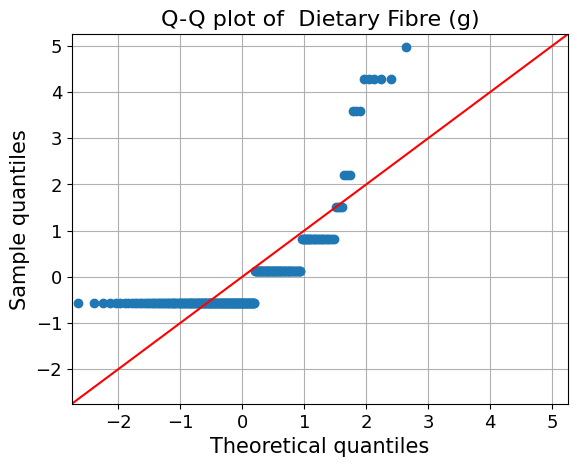

<Figure size 800x500 with 0 Axes>

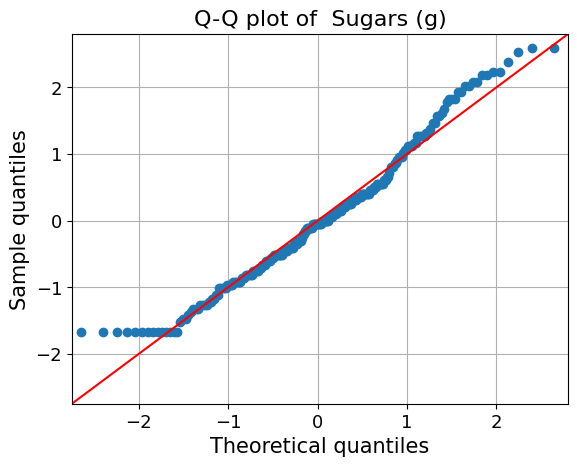

In [11]:
from statsmodels.graphics.gofplots import qqplot

data_norm = data_cleaned[
    [ 'Calories', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)' , ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)']
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()


# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

# 1 : Boxplot

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Calories'),
  Text(1, 0, 'Trans Fat (g) '),
  Text(2, 0, 'Saturated Fat (g)'),
  Text(3, 0, ' Sodium (mg)'),
  Text(4, 0, ' Total Carbohydrates (g) '),
  Text(5, 0, 'Cholesterol (mg)'),
  Text(6, 0, ' Dietary Fibre (g)'),
  Text(7, 0, ' Sugars (g)'),
  Text(8, 0, ' Protein (g) ')])

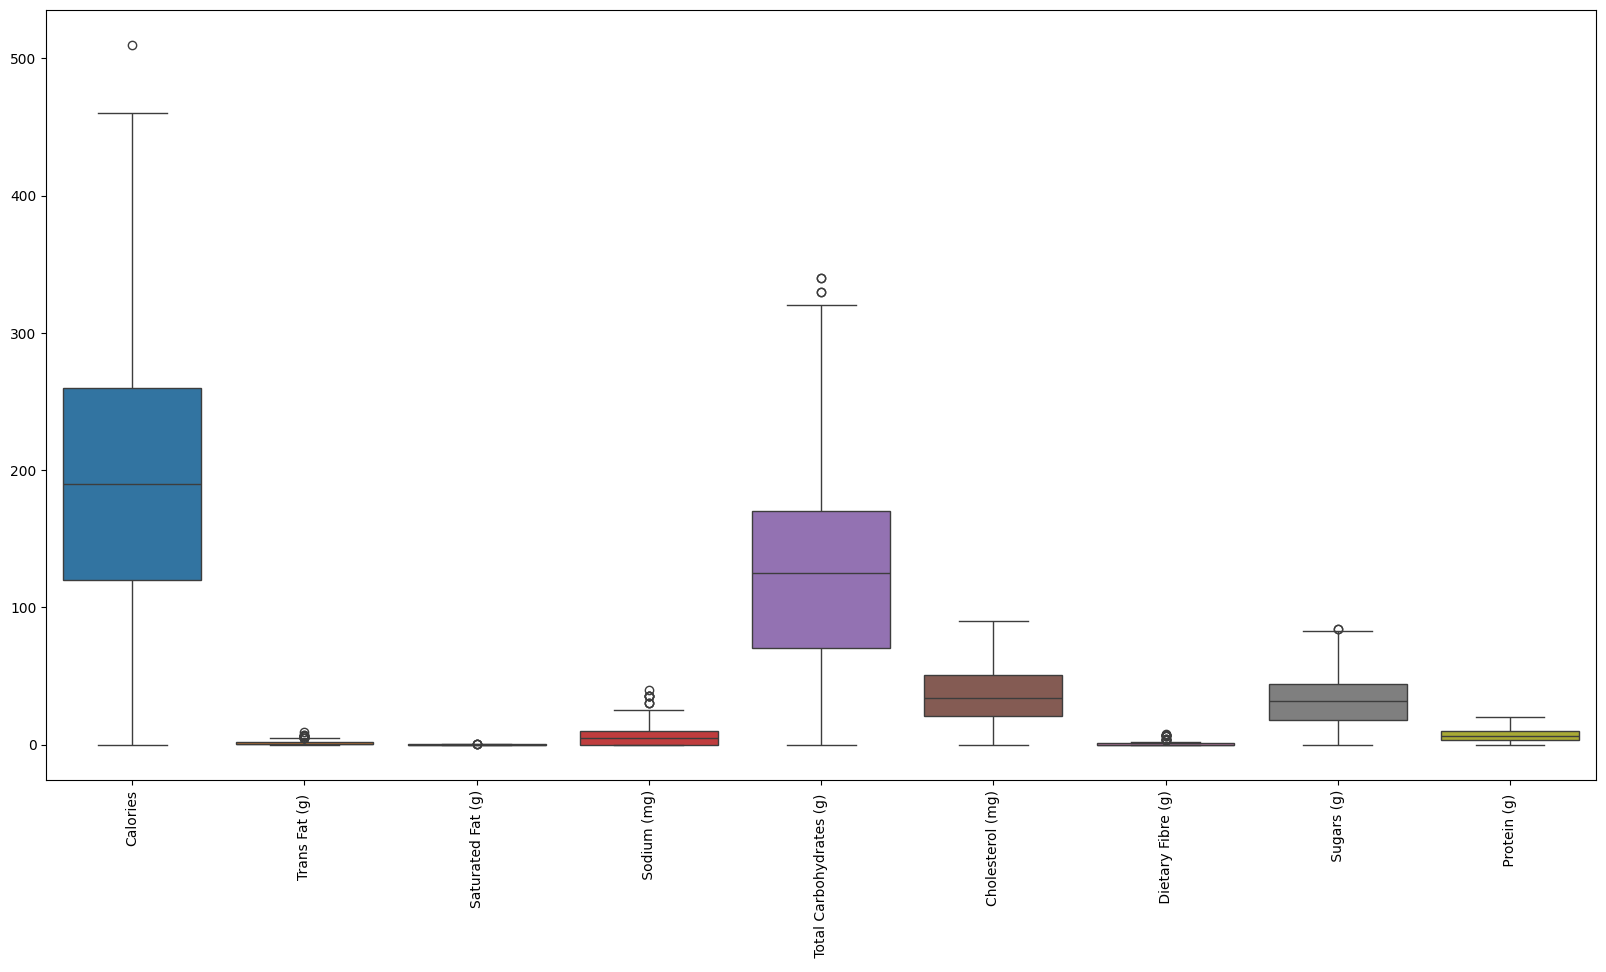

In [12]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_cleaned)
plt.xticks(rotation=90)

In [13]:
data_cleaned[' Protein (g) '].value_counts()

3.0     30
6.0     25
5.0     23
4.0     22
7.0     20
10.0    13
9.0     13
0.0     11
8.0      8
16.0     8
11.0     7
15.0     7
2.0      7
12.0     7
13.0     7
14.0     6
1.0      6
17.0     4
0.1      3
0.4      3
19.0     3
0.3      2
18.0     2
20.0     2
0.2      1
0.5      1
Name:  Protein (g) , dtype: int64

In [14]:
data_cleaned['Saturated Fat (g)'].value_counts()

0.0    179
0.1     37
0.2     21
0.3      4
Name: Saturated Fat (g), dtype: int64

# 2 : Coorelation Matrix

In [15]:
correlation_matrix = data_cleaned.corr()
independent_variables = correlation_matrix[' Protein (g) '].abs().sort_values(ascending=False).index[1:]

<ipython-input-15-903256fe9ae9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


In [16]:
independent_variables

Index(['Calories', ' Dietary Fibre (g)', ' Sodium (mg)', 'Trans Fat (g) ',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', 'Saturated Fat (g)',
       ' Sugars (g)'],
      dtype='object')

In [17]:
X = data_cleaned.iloc[:,:9]

In [18]:
X

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
236  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
237  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   \
0                 Short         3            0.1             0.0   
1                  Tall         4            0.1             0.0   
2                Grande         5            0.1             0.0   
3                 Venti         5            0.1             0.0   
4     Short Nonfat Milk        70            0.1             0.1   
..                  ...       ...            ...             ...   
236             Soymilk       320            3 2             0.4   
237    Tall Nonfat Milk       170            0.1             0.1   
238          Whole Milk       200            3.5             2.0   
239             Soymilk       180            1.5             0.2   
240  Grande Nonfat Milk       240            0.1             0.1   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   
0                  0.0             0                          5  
1                  0.0             0                         10  
2                  0.0             0                         10  
3                  0.0             0                         10  
4                  0.0             5                         75  
..                 ...           ...                        ...  
236                0.0             0                        250  
237                0.0             0                        160  
238                0.1            10                        160  
239                0.0             0                        160  
240                0.0             5                        230  

[241 rows x 9 columns]

In [19]:
unique_values = data_cleaned['Beverage_category'].unique()

In [20]:
unique_values

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [21]:
data_cleaned

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
236  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
237  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   \
0                 Short         3            0.1             0.0   
1                  Tall         4            0.1             0.0   
2                Grande         5            0.1             0.0   
3                 Venti         5            0.1             0.0   
4     Short Nonfat Milk        70            0.1             0.1   
..                  ...       ...            ...             ...   
236             Soymilk       320            3 2             0.4   
237    Tall Nonfat Milk       170            0.1             0.1   
238          Whole Milk       200            3.5             2.0   
239             Soymilk       180            1.5             0.2   
240  Grande Nonfat Milk       240            0.1             0.1   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0                  0.0             0                          5   
1                  0.0             0                         10   
2                  0.0             0                         10   
3                  0.0             0                         10   
4                  0.0             5                         75   
..                 ...           ...                        ...   
236                0.0             0                        250   
237                0.0             0                        160   
238                0.1            10                        160   
239                0.0             0                        160   
240                0.0             5                        230   

     Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
0                   0                   0            0            0.3   
1                   0                   0            0            0.5   
2                   0                   0            0            1.0   
3                   0                   0            0            1.0   
4                  10                   0            9            6.0   
..                ...                 ...          ...            ...   
236                67                   1           64            5.0   
237                39                   0           38            4.0   
238                39                   0           38            3.0   
239                37                   1           35            3.0   
240                56                   0           55            5.0   

    Vitamin A (% DV)  Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)   \
0                  0%               0%               0%           0%   
1                  0%               0%               0%           0%   
2                  0%               0%               0%           0%   
3                  0%               0%               2%           0%   
4                 10%               0%              20%           0%   
..                ...              ...              ...          ...   
236                6%               8%

In [22]:
p = pd.DataFrame({'Category': ['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème']})
p

Category
0                             Coffee
1            Classic Espresso Drinks
2          Signature Espresso Drinks
3                   Tazo® Tea Drinks
4              Shaken Iced Beverages
5                          Smoothies
6        Frappuccino® Blended Coffee
7  Frappuccino® Light Blended Coffee
8         Frappuccino® Blended Crème

In [23]:
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with a categorical column
import pandas as pd


# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'Category' column
data_cleaned['Encoded_Category'] = label_encoder.fit_transform(data_cleaned.Beverage_category)

# Print the DataFrame with encoded values
print(data_cleaned)


              Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
236  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
237  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Ca

In [24]:
data_cleaned

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
236  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
237  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   \
0                 Short         3            0.1             0.0   
1                  Tall         4            0.1             0.0   
2                Grande         5            0.1             0.0   
3                 Venti         5            0.1             0.0   
4     Short Nonfat Milk        70            0.1             0.1   
..                  ...       ...            ...             ...   
236             Soymilk       320            3 2             0.4   
237    Tall Nonfat Milk       170            0.1             0.1   
238          Whole Milk       200            3.5             2.0   
239             Soymilk       180            1.5             0.2   
240  Grande Nonfat Milk       240            0.1             0.1   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0                  0.0             0                          5   
1                  0.0             0                         10   
2                  0.0             0                         10   
3                  0.0             0                         10   
4                  0.0             5                         75   
..                 ...           ...                        ...   
236                0.0             0                        250   
237                0.0             0                        160   
238                0.1            10                        160   
239                0.0             0                        160   
240                0.0             5                        230   

     Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
0                   0                   0            0            0.3   
1                   0                   0            0            0.5   
2                   0                   0            0            1.0   
3                   0                   0            0            1.0   
4                  10                   0            9            6.0   
..                ...                 ...          ...            ...   
236                67                   1           64            5.0   
237                39                   0           38            4.0   
238                39                   0           38            3.0   
239                37                   1           35            3.0   
240                56                   0           55            5.0   

    Vitamin A (% DV)  Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)   \
0                  0%               0%               0%           0%   
1                  0%               0%               0%           0%   
2                  0%               0%               0%           0%   
3                  0%               0%               2%           0%   
4                 10%               0%              20%           0%   
..                ...              ...              ...          ...   
236                6%               8%

In [25]:
unique_values = data_cleaned['Beverage'].unique()

In [26]:
unique_values

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

In [27]:
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with a categorical column
import pandas as pd



# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'Category' column
data_cleaned['Beverage'] = label_encoder.fit_transform(data_cleaned.Beverage)

# Print the DataFrame with encoded values
print(data_cleaned)


              Beverage_category  Beverage       Beverage_prep  Calories  \
0                        Coffee         1               Short         3   
1                        Coffee         1                Tall         4   
2                        Coffee         1              Grande         5   
3                        Coffee         1               Venti         5   
4       Classic Espresso Drinks         3   Short Nonfat Milk        70   
..                          ...       ...                 ...       ...   
236  Frappuccino® Blended Crème        23             Soymilk       320   
237  Frappuccino® Blended Crème        30    Tall Nonfat Milk       170   
238  Frappuccino® Blended Crème        30          Whole Milk       200   
239  Frappuccino® Blended Crème        30             Soymilk       180   
240  Frappuccino® Blended Crème        30  Grande Nonfat Milk       240   

     Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0              0.1          

In [28]:
unique_values = data_cleaned['Beverage_prep'].unique()

In [29]:
unique_values

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with a categorical column
import pandas as pd


# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'Category' column
data_cleaned['Bevg_Prep'] = label_encoder.fit_transform(data_cleaned.Beverage_prep)

# Print the DataFrame with encoded values
print(data_cleaned)


              Beverage_category  Beverage       Beverage_prep  Calories  \
0                        Coffee         1               Short         3   
1                        Coffee         1                Tall         4   
2                        Coffee         1              Grande         5   
3                        Coffee         1               Venti         5   
4       Classic Espresso Drinks         3   Short Nonfat Milk        70   
..                          ...       ...                 ...       ...   
236  Frappuccino® Blended Crème        23             Soymilk       320   
237  Frappuccino® Blended Crème        30    Tall Nonfat Milk       170   
238  Frappuccino® Blended Crème        30          Whole Milk       200   
239  Frappuccino® Blended Crème        30             Soymilk       180   
240  Frappuccino® Blended Crème        30  Grande Nonfat Milk       240   

     Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0              0.1          

In [31]:
print(data_cleaned.columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)', 'Encoded_Category',
       'Bevg_Prep'],
      dtype='object')


In [32]:
data_cleaned

Beverage_category  Beverage       Beverage_prep  Calories  \
0                        Coffee         1               Short         3   
1                        Coffee         1                Tall         4   
2                        Coffee         1              Grande         5   
3                        Coffee         1               Venti         5   
4       Classic Espresso Drinks         3   Short Nonfat Milk        70   
..                          ...       ...                 ...       ...   
236  Frappuccino® Blended Crème        23             Soymilk       320   
237  Frappuccino® Blended Crème        30    Tall Nonfat Milk       170   
238  Frappuccino® Blended Crème        30          Whole Milk       200   
239  Frappuccino® Blended Crème        30             Soymilk       180   
240  Frappuccino® Blended Crème        30  Grande Nonfat Milk       240   

     Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0              0.1             0.0                0.0             0   
1              0.1             0.0                0.0             0   
2              0.1             0.0                0.0             0   
3              0.1             0.0                0.0             0   
4              0.1             0.1                0.0             5   
..             ...             ...                ...           ...   
236            3 2             0.4                0.0             0   
237            0.1             0.1                0.0             0   
238            3.5             2.0                0.1            10   
239            1.5             0.2                0.0             0   
240            0.1             0.1                0.0             5   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                            5                 0                   0   
1                           10                 0                   0   
2                           10                 0                   0   
3                           10                 0                   0   
4                           75                10                   0   
..                         ...               ...                 ...   
236                        250                67                   1   
237                        160                39                   0   
238                        160                39                   0   
239                        160                37                   1   
240                        230                56                   0   

      Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0              0            0.3                0%               0%   
1              0            0.5                0%               0%   
2              0            1.0                0%               0%   
3              0            1.0                0%               0%   
4              9            6.0               10%               0%   
..           ...            ...               ...              ...   
236           64            5.0                6%               8%   
237           38            4.0                6%               0%   
238           38            3.0                6%               0%   
239           35            3.0                4%               0%   
240           55            5.0                8%               0%   

     Calcium (% DV)  Iron (% DV)  Caffeine (mg)  Encoded_Category  Bevg_Prep  
0                 0%           0%           175                 1          4  
1                 0%           0%           260                 1          8  
2                 0%           0%           330                 1          2  
3                 2%           0%           410                 1         10  
4                20%           0%            75                 0          5  
..               ...          ...           ...               ...        ...  
2

In [33]:
X = data_cleaned[['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)']]             # Replace with your actual column names
y = data_cleaned[' Protein (g) ']                                                   # Replace with your actual target variable


In [34]:
print(data_cleaned['Beverage_category'].dtype)

object


In [35]:
print(data_cleaned['Beverage'].dtype)

int64


In [36]:
data_cleaned.drop(columns = 'Beverage_category', axis=1, inplace=True)   #This categorical column in drops

In [37]:
data_cleaned

Beverage       Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   \
0           1               Short         3            0.1             0.0   
1           1                Tall         4            0.1             0.0   
2           1              Grande         5            0.1             0.0   
3           1               Venti         5            0.1             0.0   
4           3   Short Nonfat Milk        70            0.1             0.1   
..        ...                 ...       ...            ...             ...   
236        23             Soymilk       320            3 2             0.4   
237        30    Tall Nonfat Milk       170            0.1             0.1   
238        30          Whole Milk       200            3.5             2.0   
239        30             Soymilk       180            1.5             0.2   
240        30  Grande Nonfat Milk       240            0.1             0.1   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0                  0.0             0                          5   
1                  0.0             0                         10   
2                  0.0             0                         10   
3                  0.0             0                         10   
4                  0.0             5                         75   
..                 ...           ...                        ...   
236                0.0             0                        250   
237                0.0             0                        160   
238                0.1            10                        160   
239                0.0             0                        160   
240                0.0             5                        230   

     Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
0                   0                   0            0            0.3   
1                   0                   0            0            0.5   
2                   0                   0            0            1.0   
3                   0                   0            0            1.0   
4                  10                   0            9            6.0   
..                ...                 ...          ...            ...   
236                67                   1           64            5.0   
237                39                   0           38            4.0   
238                39                   0           38            3.0   
239                37                   1           35            3.0   
240                56                   0           55            5.0   

    Vitamin A (% DV)  Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)   \
0                  0%               0%               0%           0%   
1                  0%               0%               0%           0%   
2                  0%               0%               0%           0%   
3                  0%               0%               2%           0%   
4                 10%               0%              20%           0%   
..                ...              ...              ...          ...   
236                6%               8%              20%          10%   
237                6%               0%              10%           0%   
238                6%               0%              10%           0%   
239                4%               0%              10%           6%   
240                8%               0%              15%           0%   

    Caffeine (mg)  Encoded_Category  Bevg_Prep  
0             175                 1          4  
1             260                 1          8  
2             330                 1          2  
3             410                 1         10  
4              75                 0          5  
..            ...               ...        ...  
236             0                 3          7  
237             0                 3          9  
238             0                 3         12  
239             0              

In [38]:
data_cleaned.drop('Beverage', axis=1, inplace=True)
data_cleaned.drop('Beverage_prep', axis=1, inplace=True)

In [39]:
data_cleaned

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0           3            0.1             0.0                0.0             0   
1           4            0.1             0.0                0.0             0   
2           5            0.1             0.0                0.0             0   
3           5            0.1             0.0                0.0             0   
4          70            0.1             0.1                0.0             5   
..        ...            ...             ...                ...           ...   
236       320            3 2             0.4                0.0             0   
237       170            0.1             0.1                0.0             0   
238       200            3.5             2.0                0.1            10   
239       180            1.5             0.2                0.0             0   
240       240            0.1             0.1                0.0             5   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                            5                 0                   0   
1                           10                 0                   0   
2                           10                 0                   0   
3                           10                 0                   0   
4                           75                10                   0   
..                         ...               ...                 ...   
236                        250                67                   1   
237                        160                39                   0   
238                        160                39                   0   
239                        160                37                   1   
240                        230                56                   0   

      Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0              0            0.3                0%               0%   
1              0            0.5                0%               0%   
2              0            1.0                0%               0%   
3              0            1.0                0%               0%   
4              9            6.0               10%               0%   
..           ...            ...               ...              ...   
236           64            5.0                6%               8%   
237           38            4.0                6%               0%   
238           38            3.0                6%               0%   
239           35            3.0                4%               0%   
240           55            5.0                8%               0%   

     Calcium (% DV)  Iron (% DV)  Caffeine (mg)  Encoded_Category  Bevg_Prep  
0                 0%           0%           175                 1          4  
1                 0%           0%           260                 1          8  
2                 0%           0%           330                 1          2  
3                 2%           0%           410                 1         10  
4                20%           0%            75                 0          5  
..               ...          ...           ...               ...        ...  
236              20%          10%             0                 3          7  
237              10%           0%             0                 3          9  
238              10%           0%             0                 3         12  
239              10%           6%             0                 3          7  
240              15%           0%             0                 3          3  

[241 rows x 17 columns]

In [ ]:
X = data_cleaned[['Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)', 'Encoded_Category' , 'Bevg_Prep']]    # Replace with your actual column names
y = data_cleaned[' Protein (g) ']                                                                                     # Replace with your actual target variable


In [ ]:
############################

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_cleaned['cafe_numic'] = label_encoder.fit_transform(data_cleaned['Caffeine (mg)'])

In [41]:
data_cleaned

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0           3            0.1             0.0                0.0             0   
1           4            0.1             0.0                0.0             0   
2           5            0.1             0.0                0.0             0   
3           5            0.1             0.0                0.0             0   
4          70            0.1             0.1                0.0             5   
..        ...            ...             ...                ...           ...   
236       320            3 2             0.4                0.0             0   
237       170            0.1             0.1                0.0             0   
238       200            3.5             2.0                0.1            10   
239       180            1.5             0.2                0.0             0   
240       240            0.1             0.1                0.0             5   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                            5                 0                   0   
1                           10                 0                   0   
2                           10                 0                   0   
3                           10                 0                   0   
4                           75                10                   0   
..                         ...               ...                 ...   
236                        250                67                   1   
237                        160                39                   0   
238                        160                39                   0   
239                        160                37                   1   
240                        230                56                   0   

      Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0              0            0.3                0%               0%   
1              0            0.5                0%               0%   
2              0            1.0                0%               0%   
3              0            1.0                0%               0%   
4              9            6.0               10%               0%   
..           ...            ...               ...              ...   
236           64            5.0                6%               8%   
237           38            4.0                6%               0%   
238           38            3.0                6%               0%   
239           35            3.0                4%               0%   
240           55            5.0                8%               0%   

     Calcium (% DV)  Iron (% DV)  Caffeine (mg)  Encoded_Category  Bevg_Prep  \
0                 0%           0%           175                 1          4   
1                 0%           0%           260                 1          8   
2                 0%           0%           330                 1          2   
3                 2%           0%           410                 1         10   
4                20%           0%            75                 0          5   
..               ...          ...           ...               ...        ...   
236              20%          10%             0                 3          7   
237              10%           0%             0                 3          9   
238              10%           0%             0                 3         12   
239              10%           6%             0                 3          7   
240              15%           0%             0                 3          3   

     cafe_numic  
0            14  
1            20  
2            23  
3            24  
4            29  
..          ...  
236           0  
237           0  
238           0  
239           0  
240           0  

[241 rows x 18 columns]

In [42]:
import pandas as pd

# Assuming df is your DataFrame and 'percentage_column' is the column with percentage values
data_cleaned['Vitamin A (% DV) '] = data_cleaned['Vitamin A (% DV) '].str.rstrip('%').astype('float') / 100.0


In [43]:
data_cleaned

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0           3            0.1             0.0                0.0             0   
1           4            0.1             0.0                0.0             0   
2           5            0.1             0.0                0.0             0   
3           5            0.1             0.0                0.0             0   
4          70            0.1             0.1                0.0             5   
..        ...            ...             ...                ...           ...   
236       320            3 2             0.4                0.0             0   
237       170            0.1             0.1                0.0             0   
238       200            3.5             2.0                0.1            10   
239       180            1.5             0.2                0.0             0   
240       240            0.1             0.1                0.0             5   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                            5                 0                   0   
1                           10                 0                   0   
2                           10                 0                   0   
3                           10                 0                   0   
4                           75                10                   0   
..                         ...               ...                 ...   
236                        250                67                   1   
237                        160                39                   0   
238                        160                39                   0   
239                        160                37                   1   
240                        230                56                   0   

      Sugars (g)   Protein (g)   Vitamin A (% DV)  Vitamin C (% DV)  \
0              0            0.3               0.00               0%   
1              0            0.5               0.00               0%   
2              0            1.0               0.00               0%   
3              0            1.0               0.00               0%   
4              9            6.0               0.10               0%   
..           ...            ...                ...              ...   
236           64            5.0               0.06               8%   
237           38            4.0               0.06               0%   
238           38            3.0               0.06               0%   
239           35            3.0               0.04               0%   
240           55            5.0               0.08               0%   

     Calcium (% DV)  Iron (% DV)  Caffeine (mg)  Encoded_Category  Bevg_Prep  \
0                 0%           0%           175                 1          4   
1                 0%           0%           260                 1          8   
2                 0%           0%           330                 1          2   
3                 2%           0%           410                 1         10   
4                20%           0%            75                 0          5   
..               ...          ...           ...               ...        ...   
236              20%          10%             0                 3          7   
237              10%           0%             0                 3          9   
238              10%           0%             0                 3         12   
239              10%           6%             0                 3          7   
240              15%           0%             0                 3          3   

     cafe_numic  
0            14  
1            20  
2            23  
3            24  
4            29  
..          ...  
236           0  
237           0  
238           0  
239           0  
240           0  

[241 rows x 18 columns]

In [44]:
data_cleaned['Vitamin C (% DV)'] = data_cleaned['Vitamin C (% DV)'].str.rstrip('%').astype('float') / 100.0

In [45]:
data_cleaned

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0           3            0.1             0.0                0.0             0   
1           4            0.1             0.0                0.0             0   
2           5            0.1             0.0                0.0             0   
3           5            0.1             0.0                0.0             0   
4          70            0.1             0.1                0.0             5   
..        ...            ...             ...                ...           ...   
236       320            3 2             0.4                0.0             0   
237       170            0.1             0.1                0.0             0   
238       200            3.5             2.0                0.1            10   
239       180            1.5             0.2                0.0             0   
240       240            0.1             0.1                0.0             5   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                            5                 0                   0   
1                           10                 0                   0   
2                           10                 0                   0   
3                           10                 0                   0   
4                           75                10                   0   
..                         ...               ...                 ...   
236                        250                67                   1   
237                        160                39                   0   
238                        160                39                   0   
239                        160                37                   1   
240                        230                56                   0   

      Sugars (g)   Protein (g)   Vitamin A (% DV)   Vitamin C (% DV)  \
0              0            0.3               0.00              0.00   
1              0            0.5               0.00              0.00   
2              0            1.0               0.00              0.00   
3              0            1.0               0.00              0.00   
4              9            6.0               0.10              0.00   
..           ...            ...                ...               ...   
236           64            5.0               0.06              0.08   
237           38            4.0               0.06              0.00   
238           38            3.0               0.06              0.00   
239           35            3.0               0.04              0.00   
240           55            5.0               0.08              0.00   

     Calcium (% DV)  Iron (% DV)  Caffeine (mg)  Encoded_Category  Bevg_Prep  \
0                 0%           0%           175                 1          4   
1                 0%           0%           260                 1          8   
2                 0%           0%           330                 1          2   
3                 2%           0%           410                 1         10   
4                20%           0%            75                 0          5   
..               ...          ...           ...               ...        ...   
236              20%          10%             0                 3          7   
237              10%           0%             0                 3          9   
238              10%           0%             0                 3         12   
239              10%           6%             0                 3          7   
240              15%           0%             0                 3          3   

     cafe_numic  
0            14  
1            20  
2            23  
3            24  
4            29  
..          ...  
236           0  
237           0  
238           0  
239           0  
240           0  

[241 rows x 18 columns]

In [46]:
data_cleaned[       ' Calcium (% DV) '] = data_cleaned[       ' Calcium (% DV) '].str.rstrip('%').astype('float') / 100.0

In [47]:
data_cleaned

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0           3            0.1             0.0                0.0             0   
1           4            0.1             0.0                0.0             0   
2           5            0.1             0.0                0.0             0   
3           5            0.1             0.0                0.0             0   
4          70            0.1             0.1                0.0             5   
..        ...            ...             ...                ...           ...   
236       320            3 2             0.4                0.0             0   
237       170            0.1             0.1                0.0             0   
238       200            3.5             2.0                0.1            10   
239       180            1.5             0.2                0.0             0   
240       240            0.1             0.1                0.0             5   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                            5                 0                   0   
1                           10                 0                   0   
2                           10                 0                   0   
3                           10                 0                   0   
4                           75                10                   0   
..                         ...               ...                 ...   
236                        250                67                   1   
237                        160                39                   0   
238                        160                39                   0   
239                        160                37                   1   
240                        230                56                   0   

      Sugars (g)   Protein (g)   Vitamin A (% DV)   Vitamin C (% DV)  \
0              0            0.3               0.00              0.00   
1              0            0.5               0.00              0.00   
2              0            1.0               0.00              0.00   
3              0            1.0               0.00              0.00   
4              9            6.0               0.10              0.00   
..           ...            ...                ...               ...   
236           64            5.0               0.06              0.08   
237           38            4.0               0.06              0.00   
238           38            3.0               0.06              0.00   
239           35            3.0               0.04              0.00   
240           55            5.0               0.08              0.00   

      Calcium (% DV)  Iron (% DV)  Caffeine (mg)  Encoded_Category  Bevg_Prep  \
0                0.00           0%           175                 1          4   
1                0.00           0%           260                 1          8   
2                0.00           0%           330                 1          2   
3                0.02           0%           410                 1         10   
4                0.20           0%            75                 0          5   
..                ...          ...           ...               ...        ...   
236              0.20          10%             0                 3          7   
237              0.10           0%             0                 3          9   
238              0.10           0%             0                 3         12   
239              0.10           6%             0                 3          7   
240              0.15           0%             0                 3          3   

     cafe_numic  
0            14  
1            20  
2            23  
3            24  
4            29  
..          ...  
236           0  
237           0  
238           0  
239           0  
240           0  

[241 rows x 18 columns]

In [48]:
data_cleaned['Iron (% DV) '] = data_cleaned['Iron (% DV) '].str.rstrip('%').astype('float') / 100.0

In [49]:
data_cleaned

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0           3            0.1             0.0                0.0             0   
1           4            0.1             0.0                0.0             0   
2           5            0.1             0.0                0.0             0   
3           5            0.1             0.0                0.0             0   
4          70            0.1             0.1                0.0             5   
..        ...            ...             ...                ...           ...   
236       320            3 2             0.4                0.0             0   
237       170            0.1             0.1                0.0             0   
238       200            3.5             2.0                0.1            10   
239       180            1.5             0.2                0.0             0   
240       240            0.1             0.1                0.0             5   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                            5                 0                   0   
1                           10                 0                   0   
2                           10                 0                   0   
3                           10                 0                   0   
4                           75                10                   0   
..                         ...               ...                 ...   
236                        250                67                   1   
237                        160                39                   0   
238                        160                39                   0   
239                        160                37                   1   
240                        230                56                   0   

      Sugars (g)   Protein (g)   Vitamin A (% DV)   Vitamin C (% DV)  \
0              0            0.3               0.00              0.00   
1              0            0.5               0.00              0.00   
2              0            1.0               0.00              0.00   
3              0            1.0               0.00              0.00   
4              9            6.0               0.10              0.00   
..           ...            ...                ...               ...   
236           64            5.0               0.06              0.08   
237           38            4.0               0.06              0.00   
238           38            3.0               0.06              0.00   
239           35            3.0               0.04              0.00   
240           55            5.0               0.08              0.00   

      Calcium (% DV)   Iron (% DV)  Caffeine (mg)  Encoded_Category  \
0                0.00          0.00           175                 1   
1                0.00          0.00           260                 1   
2                0.00          0.00           330                 1   
3                0.02          0.00           410                 1   
4                0.20          0.00            75                 0   
..                ...           ...           ...               ...   
236              0.20          0.10             0                 3   
237              0.10          0.00             0                 3   
238              0.10          0.00             0                 3   
239              0.10          0.06             0                 3   
240              0.15          0.00             0                 3   

     Bevg_Prep  cafe_numic  
0            4          14  
1            8          20  
2            2          23  
3           10          24  
4            5          29  
..         ...         ...  
236          7           0  
237          9           0  
238         12           0  
239          7           0  
240          3           0  

[241 rows x 18 columns]

In [50]:
X = data_cleaned[['Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Encoded_Category' , 'Bevg_Prep', 'cafe_numic']]             # Replace with your actual column names
y = data_cleaned[' Protein (g) ']

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Calories                   241 non-null    int64  
 1    Total Fat (g)             241 non-null    object 
 2   Trans Fat (g)              241 non-null    float64
 3   Saturated Fat (g)          241 non-null    float64
 4    Sodium (mg)               241 non-null    int64  
 5    Total Carbohydrates (g)   241 non-null    int64  
 6   Cholesterol (mg)           241 non-null    int64  
 7    Dietary Fibre (g)         241 non-null    int64  
 8    Sugars (g)                241 non-null    int64  
 9   Vitamin A (% DV)           241 non-null    float64
 10  Vitamin C (% DV)           241 non-null    float64
 11   Calcium (% DV)            241 non-null    float64
 12  Iron (% DV)                241 non-null    float64
 13  Encoded_Category           241 non-null    int64  

In [52]:
X[" Total Fat (g)"]

0      0.1
1      0.1
2      0.1
3      0.1
4      0.1
      ... 
236    3 2
237    0.1
238    3.5
239    1.5
240    0.1
Name:  Total Fat (g), Length: 241, dtype: object

In [53]:
X[" Sugars (g)"].sum()

7959

In [54]:
data_cleaned = data_cleaned.drop(237)

In [55]:
data_cleaned

Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0           3            0.1             0.0                0.0             0   
1           4            0.1             0.0                0.0             0   
2           5            0.1             0.0                0.0             0   
3           5            0.1             0.0                0.0             0   
4          70            0.1             0.1                0.0             5   
..        ...            ...             ...                ...           ...   
235       350              6             3.0                0.2            15   
236       320            3 2             0.4                0.0             0   
238       200            3.5             2.0                0.1            10   
239       180            1.5             0.2                0.0             0   
240       240            0.1             0.1                0.0             5   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                            5                 0                   0   
1                           10                 0                   0   
2                           10                 0                   0   
3                           10                 0                   0   
4                           75                10                   0   
..                         ...               ...                 ...   
235                        260                70                   0   
236                        250                67                   1   
238                        160                39                   0   
239                        160                37                   1   
240                        230                56                   0   

      Sugars (g)   Protein (g)   Vitamin A (% DV)   Vitamin C (% DV)  \
0              0            0.3               0.00              0.00   
1              0            0.5               0.00              0.00   
2              0            1.0               0.00              0.00   
3              0            1.0               0.00              0.00   
4              9            6.0               0.10              0.00   
..           ...            ...                ...               ...   
235           68            6.0               0.08              0.08   
236           64            5.0               0.06              0.08   
238           38            3.0               0.06              0.00   
239           35            3.0               0.04              0.00   
240           55            5.0               0.08              0.00   

      Calcium (% DV)   Iron (% DV)  Caffeine (mg)  Encoded_Category  \
0                0.00          0.00           175                 1   
1                0.00          0.00           260                 1   
2                0.00          0.00           330                 1   
3                0.02          0.00           410                 1   
4                0.20          0.00            75                 0   
..                ...           ...           ...               ...   
235              0.20          0.04             0                 3   
236              0.20          0.10             0                 3   
238              0.10          0.00             0                 3   
239              0.10          0.06             0                 3   
240              0.15          0.00             0                 3   

     Bevg_Prep  cafe_numic  
0            4          14  
1            8          20  
2            2          23  
3           10          24  
4            5          29  
..         ...         ...  
235         12           0  
236          7           0  
238         12           0  
239          7           0  
240          3           0  

[240 rows x 18 columns]

In [ ]:
X = data_cleaned[['Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Encoded_Category', 'Bevg_Prep', 'cafe_numic']]             # Replace with your actual column names
y = data_cleaned[' Protein (g) ']

In [56]:
X[' Total Fat (g)'][237]

'0.1'

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scalr = StandardScaler()

# x_test = pd.DataFrame(scalr.fit_transform(X), columns=X.columns)
y_tst = data_cleaned[" Protein (g) "].values.reshape(-1, 1)
y_test = pd.DataFrame(scalr.fit_transform(y_tst))

In [59]:
y_test

0
0   -1.378930
1   -1.337839
2   -1.235113
3   -1.235113
4   -0.207850
..        ...
235 -0.207850
236 -0.413302
237 -0.824208
238 -0.824208
239 -0.413302

[240 rows x 1 columns]

In [60]:
independent_variables

Index(['Calories', ' Dietary Fibre (g)', ' Sodium (mg)', 'Trans Fat (g) ',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', 'Saturated Fat (g)',
       ' Sugars (g)'],
      dtype='object')

In [61]:
X = X
y = y


In [ ]:
# As we can see the Lasso model is giving very less accuracy so it is not the best model to use.

In [68]:
X.shape

(241, 16)

In [69]:
y.shape

(241,)

# 3 : Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
feature_importances = model.feature_importances_


In [71]:
feature_importances

array([1.17700038e-02, 5.10224047e-03, 4.07506864e-03, 2.43279321e-04,
       1.49123458e-03, 4.41214671e-02, 2.47697088e-02, 1.03633575e-01,
       4.54510852e-03, 5.67754560e-01, 3.63720823e-02, 1.83176340e-01,
       5.13705094e-03, 2.40745593e-03, 1.13893557e-03, 4.26188842e-03])

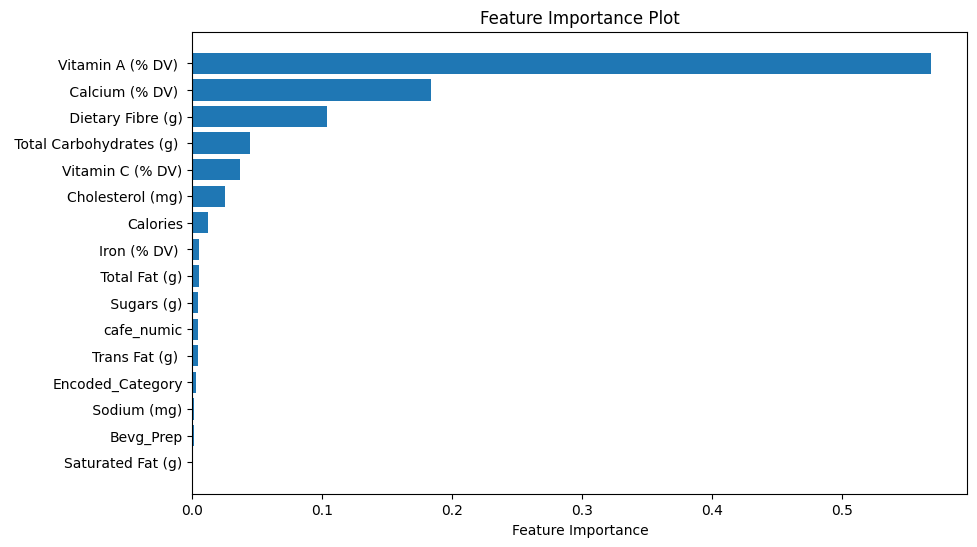

In [72]:
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.show()

In [73]:
max_depth = model.max_depth

In [74]:
max_depth

# Missing Data in Independent variables

In [75]:
data_cleaned.describe()

Calories  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
count  240.000000      240.000000         240.000000    240.000000   
mean   194.404167        1.315417           0.037917      6.395833   
std    103.061094        1.644406           0.071592      8.656000   
min      0.000000        0.000000           0.000000      0.000000   
25%    120.000000        0.100000           0.000000      0.000000   
50%    190.000000        0.500000           0.000000      5.000000   
75%    260.000000        2.000000           0.100000     10.000000   
max    510.000000        9.000000           0.300000     40.000000   

        Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
count                 240.000000        240.000000          240.000000   
mean                  129.187500         36.054167            0.812500   
std                    82.348087         20.848557            1.450094   
min                     0.000000          0.000000            0.000000   
25%                    70.000000         21.000000            0.000000   
50%                   125.000000         34.000000            0.000000   
75%                   172.500000         51.000000            1.000000   
max                   340.000000         90.000000            8.000000   

        Sugars (g)   Protein (g)   Vitamin A (% DV)   Vitamin C (% DV)  \
count   240.000000     240.000000         240.000000        240.000000   
mean     33.004167       7.011667           0.098792          0.036792   
std      19.786200       4.877472           0.081121          0.144781   
min       0.000000       0.000000           0.000000          0.000000   
25%      18.000000       3.000000           0.040000          0.000000   
50%      32.000000       6.000000           0.080000          0.000000   
75%      44.000000      10.000000           0.150000          0.000000   
max      84.000000      20.000000           0.500000          1.000000   

        Calcium (% DV)   Iron (% DV)   Encoded_Category   Bevg_Prep  \
count        240.000000    240.000000        240.000000  240.000000   
mean           0.208625      0.075083          4.016667    5.812500   
std            0.145548      0.105080          3.040819    3.926395   
min            0.000000      0.000000          0.000000    0.000000   
25%            0.100000      0.000000          1.000000    3.000000   
50%            0.200000      0.020000          4.000000    7.000000   
75%            0.300000      0.100000          7.000000    9.000000   
max            0.600000      0.500000          8.000000   12.000000   

       cafe_numic  
count  240.000000  
mean    17.466667  
std     12.299222  
min      0.000000  
25%      7.000000  
50%     15.000000  
75%     29.000000  
max     35.000000

In [76]:
data_cleaned[" Protein (g) "].isnull().sum()

0

#### we can infer that - there are no missing data in any of the columns in the dataset,
#### ....including the dependent variable "Protein (g)" and all other independent variables. Every column has zero missing values. ​​

# Do the training and test sets have the same data?

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
y = data_cleaned[' Protein (g) '].copy()
X = data_cleaned.drop(columns=[' Protein (g) '])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5200)

# Verifying the split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


#The training and test doesn't have the same data i have put 20% of the data into testing and remaining as the training data.

((192, 17), (48, 17), (192,), (48,))

#  Is the predictor variables independent of all the other predictor variables?

<ipython-input-79-89c11e0eb4b7>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = predictors.corr()


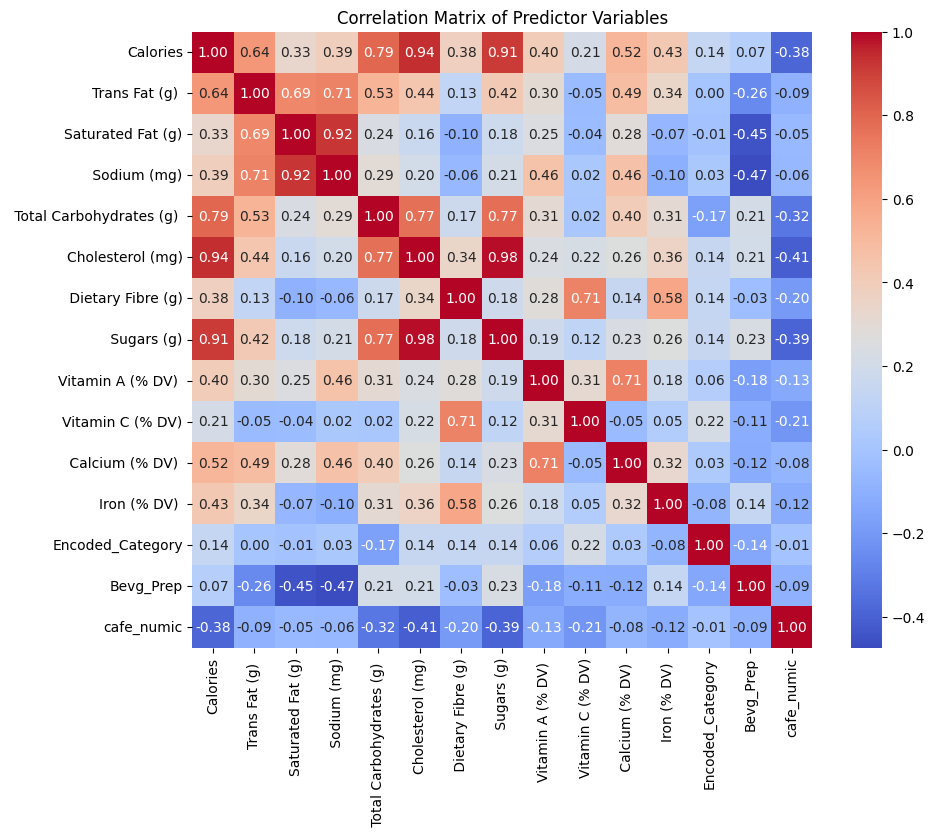

In [79]:
# To answer if the predictor variables are independent of each other, we can calculate the correlation matrix
# Load the data again to ensure we're working with the most recent version

data = pd.read_csv('test.csv')

# Drop the target variable 'Protein (g)' to focus on predictor variables
predictors = data_cleaned.drop(columns=[' Protein (g) '])

# Calculate the correlation matrix for the predictor variables
correlation_matrix = predictors.corr()

# Let's also visualize this as a heatmap for a better understanding
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

In [ ]:
# The heatmap above represents the correlation matrix of the predictor variables. Correlation values range from -1 to 1:

# A value close to 1 implies a strong positive correlation (i.e., as one variable increases, the other tends to increase).
# A value close to -1 implies a strong negative correlation (i.e., as one variable increases, the other tends to decrease).
# A value close to 0 implies little to no linear correlation between the variables.

 ## Which predictor variables are the most important?

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables before fitting the model
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

# Fit the Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X, y)

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df


Feature  Importance
9           Vitamin A (% DV)     0.441353
11            Calcium (% DV)     0.262801
7           Dietary Fibre (g)    0.171326
5    Total Carbohydrates (g)     0.054891
10           Vitamin C (% DV)    0.017821
6            Cholesterol (mg)    0.016282
0                    Calories    0.008618
12               Iron (% DV)     0.005561
2              Trans Fat (g)     0.004571
1               Total Fat (g)    0.004000
8                  Sugars (g)    0.003677
4                 Sodium (mg)    0.002265
15                  Bevg_Prep    0.002256
14           Encoded_Category    0.001976
16                 cafe_numic    0.001262
13              Caffeine (mg)    0.001188
3           Saturated Fat (g)    0.000154

In [ ]:
## Let's use a RandomForestRegressor, as it can provide a good estimate of feature importance
## According to the model, the most important features are:

# Total Carbohydrates (g) with the highest importance score.
# Calcium (% DV) as the second most important.
# Dietary Fibre (g) as the third most important

 # Do the ranges of the predictor variables make sense?

In [ ]:
# To see if the predictor variables (Independent variables) make sense we need to apply the random forest model and use feature importance model so that we can get mean , SD , min

In [81]:
le = LabelEncoder()
X_encoded = X.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# Now, you can fit the Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_encoded, y)

RandomForestRegressor(random_state=0)

In [82]:
# Re-run the feature importance extraction to get the top features
# (assuming 'X_encoded' and 'y' are already defined from previous steps).

# Fit the Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_encoded, y)

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
features_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Get the top most important features (let's take the top 3 for this example)
top_features = features_df.head(3)['Feature']

# Now output the summary statistics for these top features
summary_statistics = data[top_features].describe()
summary_statistics


Vitamin A (% DV)    Calcium (% DV)    Dietary Fibre (g)
count         240.000000        240.000000          240.000000
mean            0.098792          0.208208            0.808333
std             0.081121          0.145716            1.450989
min             0.000000          0.000000            0.000000
25%             0.040000          0.100000            0.000000
50%             0.080000          0.200000            0.000000
75%             0.150000          0.300000            1.000000
max             0.500000          0.600000            8.000000

# The ranges for Vitamin A and Calcium are expressed as a percentage of the Daily Value and seem to be within a sensible range for typical food items. However, the max value for Vitamin A at 50% could be quite high for a single serving, depending on the food type.

# For Dietary Fibre, the average of 8.00000 grams is reasonable for many food items, though the range up to 8 grams suggests that some items are high in fiber, which may be expected depending on the type of food , such as grains.

# What are the distributions of the predictor variables?   

In [83]:
distribution_summary = X.describe()

In [84]:
distribution_summary

Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
count  240.000000      240.000000      240.000000         240.000000   
mean   194.404167       10.391667        1.315417           0.037917   
std    103.061094        7.699694        1.644406           0.071592   
min      0.000000        0.000000        0.000000           0.000000   
25%    120.000000        2.000000        0.100000           0.000000   
50%    190.000000       12.000000        0.500000           0.000000   
75%    260.000000       17.000000        2.000000           0.100000   
max    510.000000       23.000000        9.000000           0.300000   

        Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
count    240.000000                 240.000000        240.000000   
mean       6.395833                 129.187500         36.054167   
std        8.656000                  82.348087         20.848557   
min        0.000000                   0.000000          0.000000   
25%        0.000000                  70.000000         21.000000   
50%        5.000000                 125.000000         34.000000   
75%       10.000000                 172.500000         51.000000   
max       40.000000                 340.000000         90.000000   

        Dietary Fibre (g)   Sugars (g)  Vitamin A (% DV)   Vitamin C (% DV)  \
count          240.000000   240.000000         240.000000        240.000000   
mean             0.812500    33.004167           0.098792          0.036792   
std              1.450094    19.786200           0.081121          0.144781   
min              0.000000     0.000000           0.000000          0.000000   
25%              0.000000    18.000000           0.040000          0.000000   
50%              0.000000    32.000000           0.080000          0.000000   
75%              1.000000    44.000000           0.150000          0.000000   
max              8.000000    84.000000           0.500000          1.000000   

        Calcium (% DV)   Iron (% DV)   Caffeine (mg)  Encoded_Category  \
count        240.000000    240.000000     240.000000        240.000000   
mean           0.208625      0.075083      17.466667          4.016667   
std            0.145548      0.105080      12.299222          3.040819   
min            0.000000      0.000000       0.000000          0.000000   
25%            0.100000      0.000000       7.000000          1.000000   
50%            0.200000      0.020000      15.000000          4.000000   
75%            0.300000      0.100000      29.000000          7.000000   
max            0.600000      0.500000      35.000000          8.000000   

        Bevg_Prep  cafe_numic  
count  240.000000  240.000000  
mean     5.812500   17.466667  
std      3.926395   12.299222  
min      0.000000    0.000000  
25%      3.000000    7.000000  
50%      7.000000   15.000000  
75%      9.000000   29.000000  
max     12.000000   35.000000

# Remove outliers

In [85]:

#  Function to remove outliers
def remove_outliers(df, columns):
    for column in columns:
        if df[column].dtype != 'object':  # Ensure the column is numeric
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # To Exclude outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Get the list of columns from which to remove outliers
# Assuming the target variable 'Protein (g)' is not to be included
columns_to_check = [column for column in data_cleaned.columns if column != ' Protein (g) ']

# Remove outliers from these columns
data_cleaned_no_outliers = remove_outliers(data_cleaned, columns_to_check)

# Check the results
print("Original data shape:", data_cleaned.shape)
print("Data without outliers shape:", data_cleaned_no_outliers.shape)


Original data shape: (240, 18)
Data without outliers shape: (122, 18)


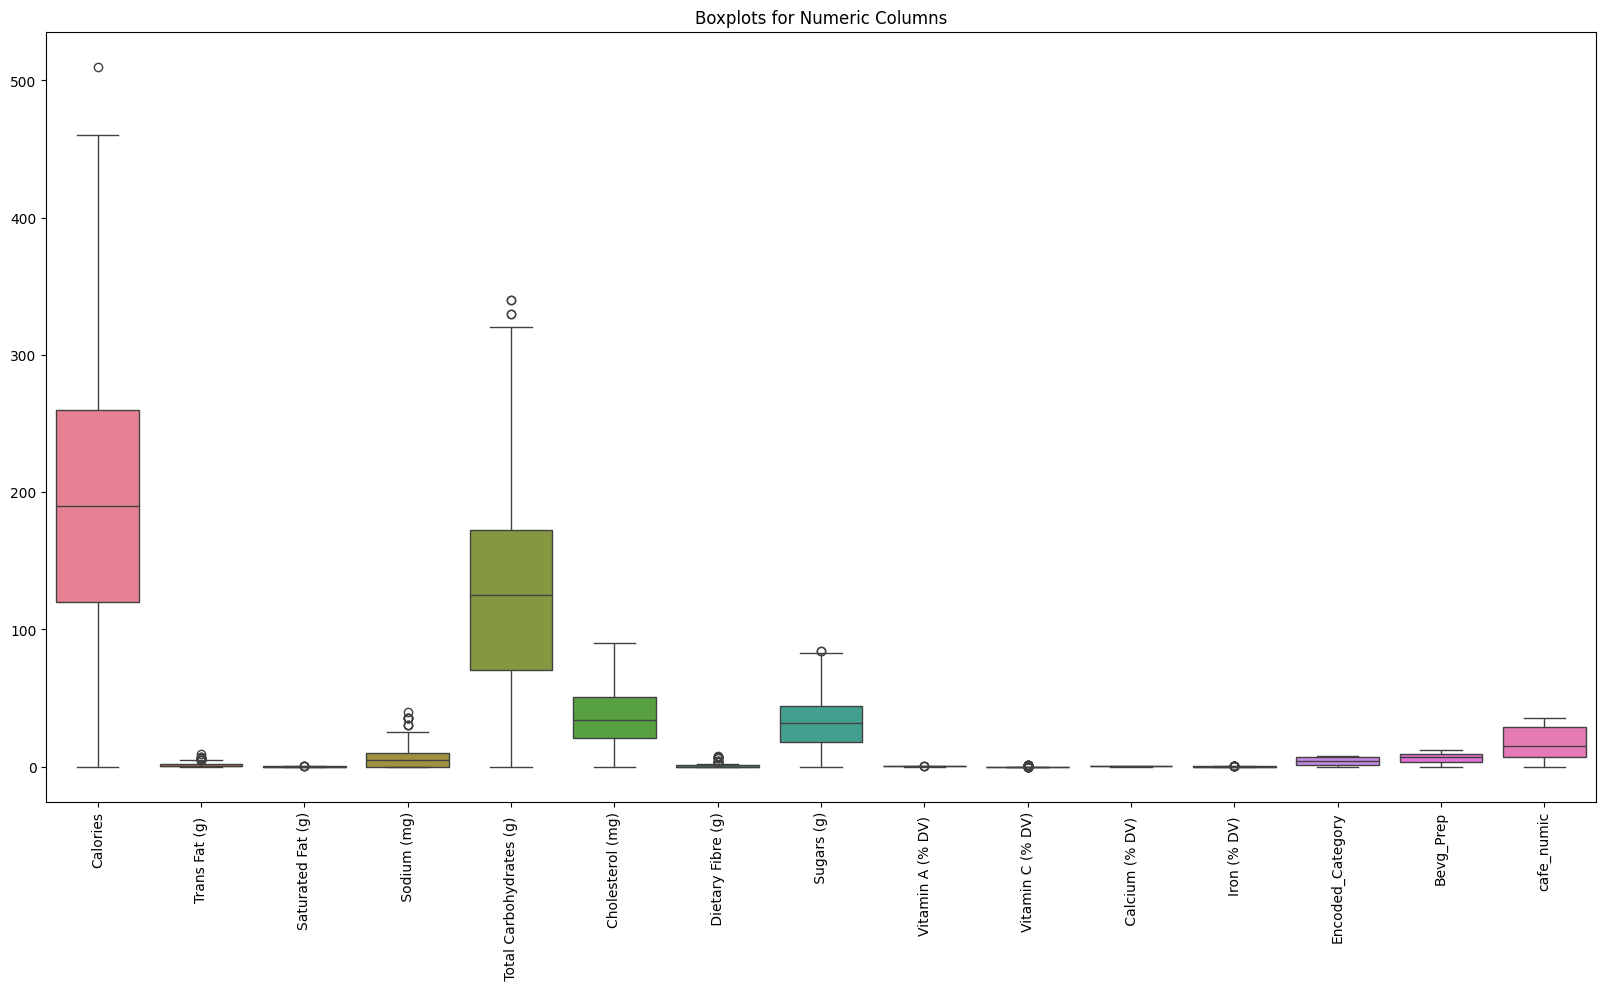

In [86]:
# Select only the numeric columns for the boxplot (excluding 'Protein (g)' if it's numeric)
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns.tolist()
if ' Protein (g) ' in numeric_cols:
    numeric_cols.remove(' Protein (g) ')

# Plot boxplots for each numeric column
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_cleaned[numeric_cols])
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Boxplots for Numeric Columns')
plt.show()



In [ ]:
# If we remove outliers the effect on the final predictive model will be -

# Improves the accuracy of parametric models by stabilizing the estimation of model parameters.
# Increases the generalizability of the model by focusing on data that represents the "normal" condition.
# Reduces the risk of overfitting, especially in models that are highly susceptible to extreme values.

# keep outliers

In [87]:
def keep_outliers(df, columns):
    outliers = pd.DataFrame()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = outliers.append(column_outliers)

    return outliers.drop_duplicates()


In [89]:
# Before calling the keep_outliers function, ensure all relevant columns are numeric
for col in columns:
    if data_cleaned[col].dtype == 'object':
        # Attempt to convert to numeric, coercing errors to NaN (or handle them as appropriate for your use case)
        data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Now you can safely apply your function
outliers_df = keep_outliers(data_cleaned, columns)


<ipython-input-87-a69edd3fac34>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-87-a69edd3fac34>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-87-a69edd3fac34>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-87-a69edd3fac34>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-87-a69edd3fac34>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [90]:
columns = data_cleaned.columns.tolist()
columns.remove(' Protein (g) ')  # Replace with your actual target column name

outliers_df = keep_outliers(data_cleaned, columns)

<ipython-input-87-a69edd3fac34>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-87-a69edd3fac34>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-87-a69edd3fac34>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-87-a69edd3fac34>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-87-a69edd3fac34>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

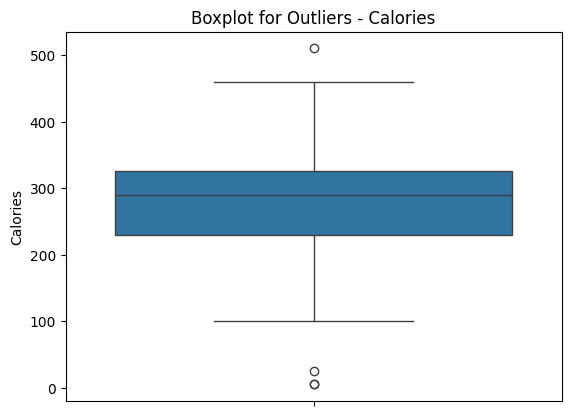

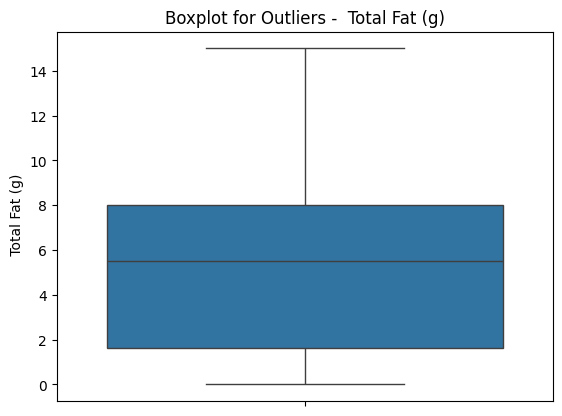

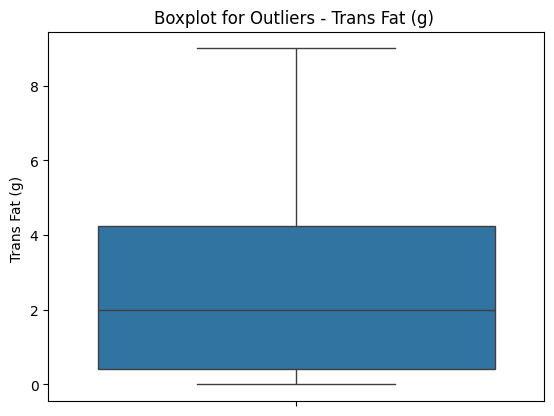

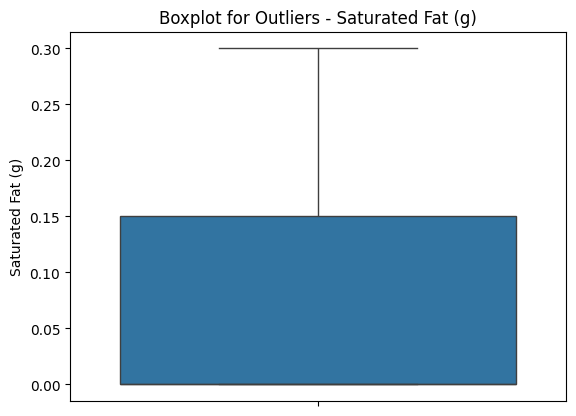

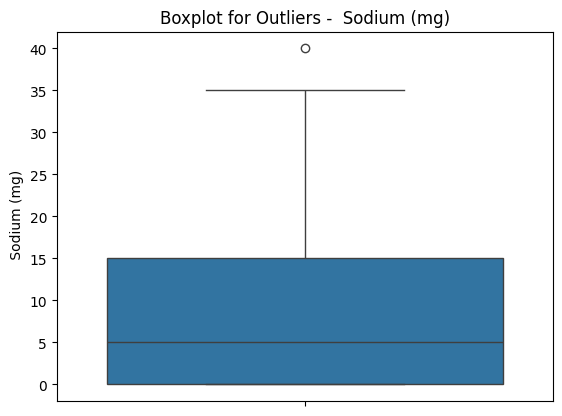

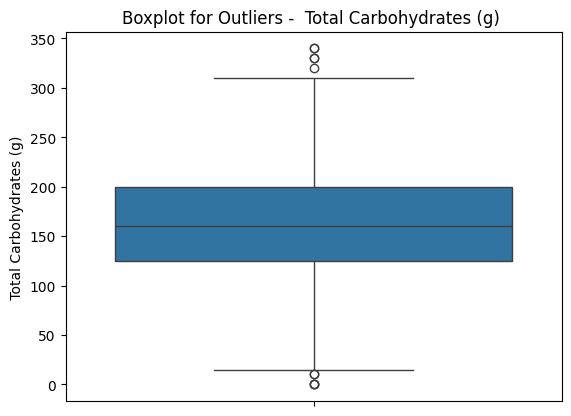

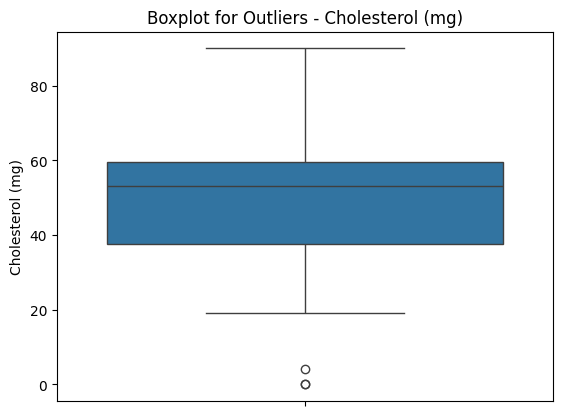

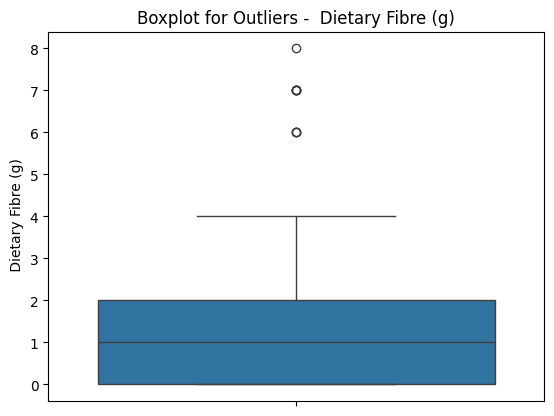

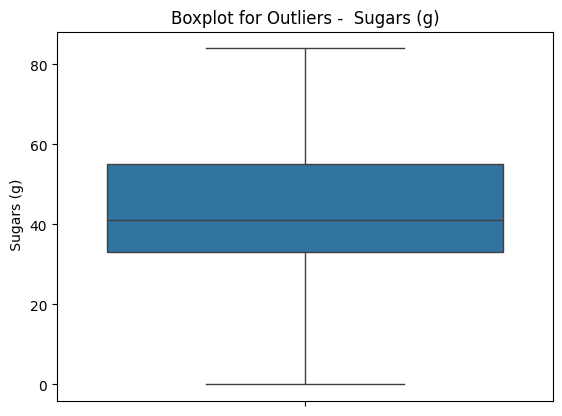

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting only the first few columns due to space constraints
for column in columns[:9]:  # Replace 4 with the number of columns you wish to plot
    sns.boxplot(data=outliers_df[column])
    plt.title(f'Boxplot for Outliers - {column}')
    plt.show()


In [92]:
# If we keep outliers the effect on the final predictive model will be -

# Helps in modeling rare events or anomalies if that's the focus of your analysis.
# Preserves the original data distribution, which can be useful if the outliers are genuine and important.
# May improve model performance if the prediction of extreme values is relevant to the problem domain.

# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods

In [93]:
import pandas as pd

# Load the dataset
file_path = 'test.csv'
data_cleaned = pd.read_csv(file_path)

# Display basic information about the dataset
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Calories                   240 non-null    int64  
 1    Total Fat (g)             240 non-null    float64
 2   Trans Fat (g)              240 non-null    float64
 3   Saturated Fat (g)          240 non-null    float64
 4    Sodium (mg)               240 non-null    int64  
 5    Total Carbohydrates (g)   240 non-null    int64  
 6   Cholesterol (mg)           240 non-null    int64  
 7    Dietary Fibre (g)         240 non-null    int64  
 8    Sugars (g)                240 non-null    int64  
 9    Protein (g)               240 non-null    float64
 10  Vitamin A (% DV)           240 non-null    float64
 11  Vitamin C (% DV)           240 non-null    float64
 12   Calcium (% DV)            240 non-null    float64
 13  Iron (% DV)                240 non-null    float64

In [94]:
import numpy as np

def remove_randomly(df, percentage):
    """
    Remove a given percentage of values randomly from the dataframe.
    """
    # Calculate number of values to remove
    total_values = df.shape[0] * df.shape[1]
    number_to_remove = int(total_values * percentage)

    # Get random indices
    indices = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
    np.random.shuffle(indices)
    selected_indices = indices[:number_to_remove]

    # Replace selected values with NaN
    df_with_nan = df.copy()
    for row, col in selected_indices:
        df_with_nan.iat[row, col] = np.nan

    return df_with_nan

# Creating datasets with 1%, 5%, and 10% of the data removed
data_1_percent = remove_randomly(data_cleaned, 0.01)
data_5_percent = remove_randomly(data_cleaned, 0.05)
data_10_percent = remove_randomly(data_cleaned, 0.10)

# Display the number of missing values in each dataset
missing_values_info = {
    "1% Missing": data_1_percent.isna().sum().sum(),
    "5% Missing": data_5_percent.isna().sum().sum(),
    "10% Missing": data_10_percent.isna().sum().sum()
}

missing_values_info



{'1% Missing': 40, '5% Missing': 204, '10% Missing': 408}

In [95]:
from sklearn.impute import SimpleImputer

# Function to impute missing values using different methods
def impute_missing_values(data, strategy):
    """
    Impute missing values in a DataFrame using a specified strategy.
    """
    imputer = SimpleImputer(strategy=strategy)
    return pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Imputing missing values for each dataset using mean, median, and mode
data_1_percent_mean = impute_missing_values(data_1_percent, 'mean')
data_1_percent_median = impute_missing_values(data_1_percent, 'median')
data_1_percent_mode = impute_missing_values(data_1_percent, 'most_frequent')

data_5_percent_mean = impute_missing_values(data_5_percent, 'mean')
data_5_percent_median = impute_missing_values(data_5_percent, 'median')
data_5_percent_mode = impute_missing_values(data_5_percent, 'most_frequent')

data_10_percent_mean = impute_missing_values(data_10_percent, 'mean')
data_10_percent_median = impute_missing_values(data_10_percent, 'median')
data_10_percent_mode = impute_missing_values(data_10_percent, 'most_frequent')

# Checking if the imputation was successful by counting NaN values in the imputed datasets
imputed_data_info = {
    "1% Missing (Mean Imputed)": data_1_percent_mean.isna().sum().sum(),
    "1% Missing (Median Imputed)": data_1_percent_median.isna().sum().sum(),
    "1% Missing (Mode Imputed)": data_1_percent_mode.isna().sum().sum(),
    "5% Missing (Mean Imputed)": data_5_percent_mean.isna().sum().sum(),
    "5% Missing (Median Imputed)": data_5_percent_median.isna().sum().sum(),
    "5% Missing (Mode Imputed)": data_5_percent_mode.isna().sum().sum(),
    "10% Missing (Mean Imputed)": data_10_percent_mean.isna().sum().sum(),
    "10% Missing (Median Imputed)": data_10_percent_median.isna().sum().sum(),
    "10% Missing (Mode Imputed)": data_10_percent_mode.isna().sum().sum(),
}

imputed_data_info



{'1% Missing (Mean Imputed)': 0,
 '1% Missing (Median Imputed)': 0,
 '1% Missing (Mode Imputed)': 0,
 '5% Missing (Mean Imputed)': 0,
 '5% Missing (Median Imputed)': 0,
 '5% Missing (Mode Imputed)': 0,
 '10% Missing (Mean Imputed)': 0,
 '10% Missing (Median Imputed)': 0,
 '10% Missing (Mode Imputed)': 0}

In [96]:
# Load the original dataset for comparison
original_data_path = 'test.csv'
original_data = pd.read_csv(original_data_path)

# Function to calculate the difference between the imputed and original data
def calculate_imputation_accuracy(original, imputed):
    differences = original - imputed
    mse = np.mean(np.square(differences))
    return mse

# Calculate Mean Squared Error for each imputation method
mse_1_percent_mean = calculate_imputation_accuracy(original_data, data_1_percent_mean)
mse_1_percent_median = calculate_imputation_accuracy(original_data, data_1_percent_median)
mse_1_percent_mode = calculate_imputation_accuracy(original_data, data_1_percent_mode)

mse_5_percent_mean = calculate_imputation_accuracy(original_data, data_5_percent_mean)
mse_5_percent_median = calculate_imputation_accuracy(original_data, data_5_percent_median)
mse_5_percent_mode = calculate_imputation_accuracy(original_data, data_5_percent_mode)

mse_10_percent_mean = calculate_imputation_accuracy(original_data, data_10_percent_mean)
mse_10_percent_median = calculate_imputation_accuracy(original_data, data_10_percent_median)
mse_10_percent_mode = calculate_imputation_accuracy(original_data, data_10_percent_mode)

# Compile the MSE values for comparison
mse_results = {
    "1% Missing (Mean Imputation)": mse_1_percent_mean,
    "1% Missing (Median Imputation)": mse_1_percent_median,
    "1% Missing (Mode Imputation)": mse_1_percent_mode,
    "5% Missing (Mean Imputation)": mse_5_percent_mean,
    "5% Missing (Median Imputation)": mse_5_percent_median,
    "5% Missing (Mode Imputation)": mse_5_percent_mode,
    "10% Missing (Mean Imputation)": mse_10_percent_mean,
    "10% Missing (Median Imputation)": mse_10_percent_median,
    "10% Missing (Mode Imputation)": mse_10_percent_mode
}

mse_results



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

{'1% Missing (Mean Imputation)': Calories                      0.000000
  Total Fat (g)                0.055016
 Trans Fat (g)                 0.015912
 Saturated Fat (g)             0.000016
  Sodium (mg)                  0.346642
  Total Carbohydrates (g)     59.311609
 Cholesterol (mg)             15.759516
  Dietary Fibre (g)            0.000311
  Sugars (g)                   5.649190
  Protein (g)                  0.500314
 Vitamin A (% DV)              0.000006
 Vitamin C (% DV)              0.000017
  Calcium (% DV)               0.000049
 Iron (% DV)                   0.000023
 Encoded_Category              0.004063
 Bevg_Prep                     0.128615
 cafe_numic                    1.593518
 dtype: float64,
 '1% Missing (Median Imputation)': Calories                      0.000000
  Total Fat (g)                0.060417
 Trans Fat (g)                 0.001125
 Saturated Fat (g)             0.000042
  Sodium (mg)                  0.208333
  Total Carbohydrates (g)     55.1041

# How well did the methods recover the missing values?

# 1% Missing Data:

Mean Imputation:
MSE across various features ranges from 0.0 to 80.09
Median Imputation:
MSE ranges from 0.0 to 78.54
Mode Imputation:
MSE ranges from 0.0 to 105.52

# 5% Missing Data:

Mean Imputation:
MSE ranges from 0.0 to 195.23
Median Imputation:
MSE ranges from 0.0 to 194.08
Mode Imputation:
MSE ranges from 0.0 to 263.96

# 10% Missing Data:

Mean Imputation:
MSE ranges from 0.0 to 386.66
Median Imputation:
MSE ranges from 0.0 to 387.81
Mode Imputation:
MSE ranges from 0.0 to 526.15

# These results indicate that as the percentage of missing data increases, the difficulty in accurately imputing the values also increases, reflected in the higher MSE values. For the 1% missing data case, the mean and median imputation methods seem to perform similarly and better than mode imputation. For the 5% and 10% missing data cases, the mean and median methods continue to perform better than mode imputation, with similar levels of accuracy to each other.

In [97]:
# Identifying numeric columns in the dataset
numeric_columns = original_data.select_dtypes(include=[np.number]).columns

# Function to calculate residuals and percentage error
def calculate_residuals_and_percentage_error(original, imputed):
    residuals = original - imputed
    percentage_error = (residuals / original) * 100
    return residuals, percentage_error

# Function to calculate bias and variance of error
def calculate_bias_and_variance(residuals):
    bias = residuals.mean()
    variance = residuals.var()
    return bias, variance

# Calculate residuals, percentage error, bias, and variance for each imputation method
results = {}

for dataset_name, imputed_data in [
    ("1% Mean", data_1_percent_mean),
    ("1% Median", data_1_percent_median),
    ("1% Mode", data_1_percent_mode),
    ("5% Mean", data_5_percent_mean),
    ("5% Median", data_5_percent_median),
    ("5% Mode", data_5_percent_mode),
    ("10% Mean", data_10_percent_mean),
    ("10% Median", data_10_percent_median),
    ("10% Mode", data_10_percent_mode)]:

    residuals, percentage_error = calculate_residuals_and_percentage_error(
        original_data[numeric_columns],
        imputed_data[numeric_columns]
    )

    bias, variance = calculate_bias_and_variance(residuals)

    results[dataset_name] = {
        "Bias": bias,
        "Variance": variance,
        "Mean Percentage Error": percentage_error.abs().mean()
    }

results



{'1% Mean': {'Bias': Calories                     0.000000
   Total Fat (g)               0.004944
  Trans Fat (g)               -0.014103
  Saturated Fat (g)            0.000260
   Sodium (mg)                -0.053746
   Total Carbohydrates (g)    -0.497123
  Cholesterol (mg)             0.058712
   Dietary Fibre (g)           0.001611
   Sugars (g)                  0.177346
   Protein (g)                 0.016862
  Vitamin A (% DV)            -0.000158
  Vitamin C (% DV)            -0.000461
   Calcium (% DV)             -0.000453
  Iron (% DV)                 -0.000312
  Encoded_Category             0.004114
  Bevg_Prep                    0.010707
  cafe_numic                  -0.108964
  dtype: float64,
  'Variance': Calories                      0.000000
   Total Fat (g)                0.055222
  Trans Fat (g)                 0.015779
  Saturated Fat (g)             0.000016
   Sodium (mg)                  0.345192
   Total Carbohydrates (g)     59.311609
  Cholesterol (mg)       

# For categorical data, calculate the accuracy and a confusion matrix.

In [98]:
# Since the target variable is continous variable we cannot categories it and hence accuracy and confusion matrix cannot be built.

# DONE

# MIT LICENSE


MIT License

Copyright (c) 2024 pranav1414

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **AutoML**

# Installing H2O.ai library

# Abstract

# 1) What is the question
# 2) What did you do?
# 3) What were the results?

# The goal was to construct a realistic model to precisely predict the importance and share of protein with other nutrient . It is generally believed that it’s impossible to precisely predict the protein content in a meal as it depends on various factors. For this dataset protein (g) is the dependent variable and others are independent variables. First, major factors affecting the protein content should be selected. Then, a model for protein content prediction should be established from linear regression. That should be applied to the given dataset to test the model. Through the data analysis and test it can be summarized that the linear regression model can effectively predict and analyze the housing price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

# Description about the Dataset


This dataset contains the nutrition info for Starbucks menu items.

The 'Beverage_category' column classifies the type of beverage, such as coffee, tea, or smoothie. The 'Beverage' column provides the specific name of the drink, for instance, Caramel Macchiato or Green Tea Latte.

The 'Beverage_prep' column details the preparation method of the beverage, including whether it's served hot or cold, and any additional ingredients or toppings like whipped cream or syrup. The 'Calories' column lists the total caloric content of each beverage, providing insight into the energy provided by each drink.

The next three columns, 'Total Fat (g)', 'Trans Fat (g)', and 'Saturated Fat (g)', provide a breakdown of the fat content in each beverage. These columns are crucial for those monitoring their fat intake for health or dietary reasons. The 'Sodium (mg)' column indicates the amount of sodium in each beverage, which is essential information for individuals on low-sodium diets.

The 'Total Carbohydrates (g)' column provides the total carbohydrate content, including sugars, which is particularly useful for people managing diabetes or following a low-carb diet. Lastly, the 'Cholesterol (mg)' column lists the amount of cholesterol in each beverage, a critical factor for those monitoring their cholesterol levels.

This dataset serves as a comprehensive guide to the nutritional content of Starbucks beverages, making it a valuable resource for researchers, dietitians, and health-conscious consumers.

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [100]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.1 MB/s eta 0:00:00


In [101]:
import h2o

# Initialize the H2O cluster
h2o.init()

data_path = 'test.csv'
data = h2o.import_file(data_path)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdhi8d5yt
  JVM stdout: /tmp/tmpdhi8d5yt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdhi8d5yt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_8ax2yy
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [102]:

data_path = data_path = 'test.csv'
data = h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [103]:
# Since the dataset is loaded and its structure is understood, let's proceed with H2O AutoML
# Initialize H2O and run an AutoML model to analyze the dataset

import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init(max_mem_size="2G", nthreads=-1)

# Convert the pandas dataframe to H2O frame
h2o_df = h2o.H2OFrame(data)

# Identify predictor columns and a target column
# Assuming the last column 'cafe_numic' as the target for this example. Adjust according to the actual analysis requirement
predictors = h2o_df.columns[:-1]
target = 'Protein (g) '

# Split the data into train and test sets for validation purpose
train, test = h2o_df.split_frame(ratios=[0.8])

# Run H2O AutoML
automl = H2OAutoML(max_models=10, seed=1, max_runtime_secs=300)
automl.train(x=predictors, y=target, training_frame=train)

# Display the leaderboard
automl.leaderboard.head()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         23 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_8ax2yy
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

AutoML progress: |██
19:13:52.302: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 190.0.

█████████████████████████████████████████████████████████████| (done) 100%


model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20240331_191343  0.705819  0.498181  0.510993  0.129532                  0.498181
StackedEnsemble_AllModels_1_AutoML_1_20240331_191343     0.707533  0.500603  0.499136  0.127082                  0.500603
GBM_5_AutoML_1_20240331_191343                           0.712734  0.50799   0.485861  0.124187                  0.50799
XRT_1_AutoML_1_20240331_191343                           0.905516  0.819958  0.607466  0.146594                  0.819958
GLM_1_AutoML_1_20240331_191343                           0.970665  0.942191  0.698116  0.131813                  0.942191
DRF_1_AutoML_1_20240331_191343                           0.983512  0.967296  0.638164  0.123521                  0.967296
XGBoost_3_AutoML_1_20240331_191343                       0.985396  0.971006  0.646662  0.121161                  0.971006
XGBoost_2_AutoML_1_20240331_191343                       1.06673   1.13791   0.65671   0.1681                    1.13791
GBM_2_AutoML_1_20240331_191343                           1.08695   1.18145   0.709845  0.180733                  1.18145
GBM_3_AutoML_1_20240331_191343                           1.10389   1.21858   0.703351  0.180996                  1.21858
[10 rows x 6 columns]

# By looking at the mean square value we can sy that 'AutoML_1_20240215_101413' model is the best model among ll other models

In [104]:
data.describe()

Rows:240
Cols:17

Calories            Total Fat (g)       Trans Fat (g)       Saturated Fat (g)    Sodium (mg)        Total Carbohydrates (g)     Cholesterol (mg)    Dietary Fibre (g)    Sugars (g)          Protein (g)        Vitamin A (% DV)     Vitamin C (% DV)     Calcium (% DV)       Iron (% DV)          Encoded_Category    Bevg_Prep           cafe_numic
-------  ------------------  ------------------  ------------------  -------------------  -----------------  --------------------------  ------------------  -------------------  ------------------  -----------------  -------------------  -------------------  -------------------  -------------------  ------------------  ------------------  ------------------
type     int                 real                real                real                 int                int                         int                 int                  int                 real               real                 real                 real                 real                 int                 int                 int
mins     0.0                 0.0                 0.0                 0.0                  0.0                0.0                         0.0                 0.0                  0.0                 0.0                0.0                  0.0                  0.0                  0.0                  0.0                 0.0                 0.0
mean     193.77916666666653  2.911666666666667   1.314166666666666   0.03791666666666666  6.395833333333337  128.81250000000003          35.9375             0.8083333333333331   32.89583333333333   7.007499999999994  0.09879166666666664  0.03645833333333335  0.20820833333333325  0.07466666666666673  4.0166666666666675  5.820833333333333   17.466666666666686
maxs     510.0               15.0                9.0                 0.3                  40.0               340.0                       90.0                8.0                  84.0                20.0               0.5                  1.0                  0.6                  0.5                  8.0                 12.0                35.0
sigma    102.75060793136454  2.9540323007764626  1.6452185485595545  0.0715915405270404   8.65600036962131   81.9998102482752            20.752785012476235  1.4509891782976738   19.686708962213597  4.879624831247155  0.08112054110815103  0.1447735149865543   0.14571608755708076  0.10517913257992284  3.040819459398782   3.9310457440180047  12.299221551264338
zeros    4                   21                  33                  178                  111                11                          8                   140                  14                  11                 27                   187                  23                   107                  58                  49                  34
missing  0                   0                   0                   0                    0                  0                           0                   0                    0                   0                  0                    0                    0                    0                    0                   0                   0
0        3.0                 0.1                 0.0                 0.0                  0.0                5.0                         0.0                 0.0                  0.0                 0.3                0.0                  0.0                  0.0                  0.0                  1.0                 4.0                 14.0
1        4.0                 0.1                 0.0                 0.0                  0.0                10.0                        0.0                 0.0                  0.0                 0.5                0.0                  0.0                  0.0                  0.0                  1.0                 8.0                 20.0
2        5.0                 0.1                 0.0                 0.0                  0.0                10.0                        0.0                 0.0  

In [105]:
import pandas as pd

# Load the dataset
df = pd.read_csv('test.csv')

# Generate descriptive statistics
stats = df.describe()

# Display the statistics
print(stats)


         Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
count  240.000000      240.000000      240.000000         240.000000   
mean   193.779167        2.911667        1.314167           0.037917   
std    102.750608        2.954032        1.645219           0.071592   
min      0.000000        0.000000        0.000000           0.000000   
25%    120.000000        0.200000        0.100000           0.000000   
50%    185.000000        2.500000        0.500000           0.000000   
75%    260.000000        4.500000        2.000000           0.100000   
max    510.000000       15.000000        9.000000           0.300000   

        Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
count    240.000000                  240.00000        240.000000   
mean       6.395833                  128.81250         35.937500   
std        8.656000                   81.99981         20.752785   
min        0.000000                    0.00000          0.000000   
25%        

In [106]:
data.shape

(240, 17)

In [107]:
pip install scikit-learn

In [108]:
import h2o
from h2o.automl import H2OAutoML

# Initialize the H2O cluster
h2o.init()

# Load data into H2O
data_path = 'test.csv'
data = h2o.import_file(data_path)

# Define the target and predictor variables
y = ' Protein (g) '
X = [name for name in data.columns if name != y]

# Split the data into 80% training and 20% testing
train, test = data.split_frame(ratios=[0.8], seed=1)

# Display the number of rows in train and test sets
print("Train dataset rows: ", train.nrow)
print("Test dataset rows: ", test.nrow)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 min 33 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_8ax2yy
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.164 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Train dataset rows:  197
Test dataset rows:  43


# 1)

In [109]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming the DataFrame is already loaded and named 'data'
# Since the code state has been reset, re-import the DataFrame from the CSV file provided earlier
data = pd.read_csv('test.csv')

# The 'add_constant' function adds a column of ones to an array
# This is required because VIF computation needs an intercept in the model
data_with_constant = add_constant(data)

# Create a new DataFrame for the VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = data_with_constant.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_with_constant.values, i)
                   for i in range(data_with_constant.shape[1])]

vif_data


feature         VIF
0                       const   18.634383
1                    Calories  422.650218
2               Total Fat (g)   68.039871
3              Trans Fat (g)    17.120643
4           Saturated Fat (g)   16.302160
5                 Sodium (mg)   20.526522
6    Total Carbohydrates (g)     4.854776
7            Cholesterol (mg)  644.058501
8           Dietary Fibre (g)   18.586013
9                  Sugars (g)  517.481672
10               Protein (g)    62.016197
11          Vitamin A (% DV)     4.291451
12           Vitamin C (% DV)    4.553678
13            Calcium (% DV)    41.395837
14               Iron (% DV)     7.043524
15           Encoded_Category    1.671107
16                  Bevg_Prep    1.733370
17                 cafe_numic    1.299700

In [110]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load the data from your local file system
data = pd.read_csv('test.csv')

# Select features excluding the target variable 'cafe_numic'
X = data.drop(columns=[])

# Add a constant term for the intercept (necessary for VIF calculation)
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                     Variable         VIF
0                       const   18.634383
1                    Calories  422.650218
2               Total Fat (g)   68.039871
3              Trans Fat (g)    17.120643
4           Saturated Fat (g)   16.302160
5                 Sodium (mg)   20.526522
6    Total Carbohydrates (g)     4.854776
7            Cholesterol (mg)  644.058501
8           Dietary Fibre (g)   18.586013
9                  Sugars (g)  517.481672
10               Protein (g)    62.016197
11          Vitamin A (% DV)     4.291451
12           Vitamin C (% DV)    4.553678
13            Calcium (% DV)    41.395837
14               Iron (% DV)     7.043524
15           Encoded_Category    1.671107
16                  Bevg_Prep    1.733370
17                 cafe_numic    1.299700


# Based on these results, some variables like Calories, Total Fat (g), Cholesterol (mg), and Sugars (g) show high VIF values, which suggests that these variables may be highly collinear with other independent variables in the dataset
# A rule of thumb is that if the VIF is greater than 10, it suggests that the variable is highly collinear with other independent variables in the model, and you might want to consider removing it to improve the model. In your dataset, several variables, like 'Calories', 'Cholesterol (mg)', and 'Sugars (g)', have high VIFs, indicating potential multicollinearity issues. ​

In [111]:
import statsmodels.api as sm

# Assuming 'data' is your DataFrame and 'cafe_numic' is your target variable
# Selecting features by excluding the target variable
X = data.drop(' Protein (g) ', axis=1)
y = data[' Protein (g) ']

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fitting the OLS model
model = sm.OLS(y, X).fit()

# Viewing the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Protein (g)    R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     850.4
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          6.64e-190
Time:                        19:15:09   Log-Likelihood:                -225.17
No. Observations:                 240   AIC:                             484.3
Df Residuals:                     223   BIC:                             543.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Conventionally, a p-value less than 0.05 (or less than 5%) is considered to be statistically significant
# The p-value for Total Carbohydrates (g) is 0.014, which is below the 0.05 threshold, suggesting that Total Carbohydrates (g) is a statistically significant predictor in this model, samw with  Sodium (mg)  with value 0.009.
# The p-value for Vitamin A (% DV) is 0.003, also indicating statistical significance.

# Here we the accuracy of 98.4% , which is very good and so we can infer that this model is a good model.

# ==> Calculating correlation matrix for all variables

In [112]:
import pandas as pd

# Load the dataset
df = pd.read_csv( 'test.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_matrix


Calories   Total Fat (g)  Trans Fat (g)   \
Calories                   1.000000        0.633453        0.647712   
 Total Fat (g)             0.633453        1.000000        0.890890   
Trans Fat (g)              0.647712        0.890890        1.000000   
Saturated Fat (g)          0.333661        0.619331        0.694169   
 Sodium (mg)               0.393515        0.588274        0.707414   
 Total Carbohydrates (g)   0.792594        0.449464        0.529730   
Cholesterol (mg)           0.939536        0.372411        0.444736   
 Dietary Fibre (g)         0.383550        0.258231        0.130669   
 Sugars (g)                0.909007        0.330151        0.425148   
 Protein (g)               0.580753        0.549772        0.495092   
Vitamin A (% DV)           0.408309        0.319516        0.303290   
Vitamin C (% DV)           0.214030       -0.030232       -0.048132   
 Calcium (% DV)            0.518570        0.618920        0.488896   
Iron (% DV)                0.425671        0.511217        0.344780   
Encoded_Category           0.140260        0.020520        0.004134   
Bevg_Prep                  0.070383       -0.258199       -0.256833   
cafe_numic                -0.374889       -0.096242       -0.093812   

                           Saturated Fat (g)   Sodium (mg)  \
Calories                            0.333661      0.393515   
 Total Fat (g)                      0.619331      0.588274   
Trans Fat (g)                       0.694169      0.707414   
Saturated Fat (g)                   1.000000      0.920264   
 Sodium (mg)                        0.920264      1.000000   
 Total Carbohydrates (g)            0.240766      0.296645   
Cholesterol (mg)                    0.164378      0.204992   
 Dietary Fibre (g)                 -0.094890     -0.060228   
 Sugars (g)                         0.182421      0.211893   
 Protein (g)                        0.285437      0.496141   
Vitamin A (% DV)                    0.249276      0.458553   
Vitamin C (% DV)                   -0.043103      0.024662   
 Calcium (% DV)                     0.285692      0.462756   
Iron (% DV)                        -0.068050     -0.101168   
Encoded_Category                   -0.012525      0.026931   
Bevg_Prep                          -0.448540     -0.474637   
cafe_numic                         -0.054393     -0.060773   

                            Total Carbohydrates (g)   Cholesterol (mg)  \
Calories                                    0.792594          0.939536   
 Total Fat (g)                              0.449464          0.372411   
Trans Fat (g)                               0.529730          0.444736   
Saturated Fat (g)                           0.240766          0.164378   
 Sodium (mg)                                0.296645          0.204992   
 Total Carbohydrates (g)                    1.000000          0.763683   
Cholesterol (mg)                            0.763683          1.000000   
 Dietary Fibre (g)                          0.171097          0.341559   
 Sugars (g)                                 0.768690          0.984034   
 Protein (g)                                0.412022          0.362463   
Vitamin A (% DV)                            0.312716          0.244393   
Vitamin C (% DV)                            0.013566          0.222524   
 Calcium (% DV)                             0.403920          0.262450   
Iron (% DV)                                 0.304289          0.354815   
Encoded_Category                           -0.168478          0.146149   
Bevg_Prep                                   0.211083          0.204810   
cafe_numic                                 -0.319288         -0.404307   

                            Dietary Fibre (g)   Sugars (g)   Protein (g)   \
Calories                             0.383550     0.909007       0.580753   
 Total Fat (g)                       0.258231     0.330151       0.549772   
Trans Fat (g)                        0.130669     0.425148       0.

# The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

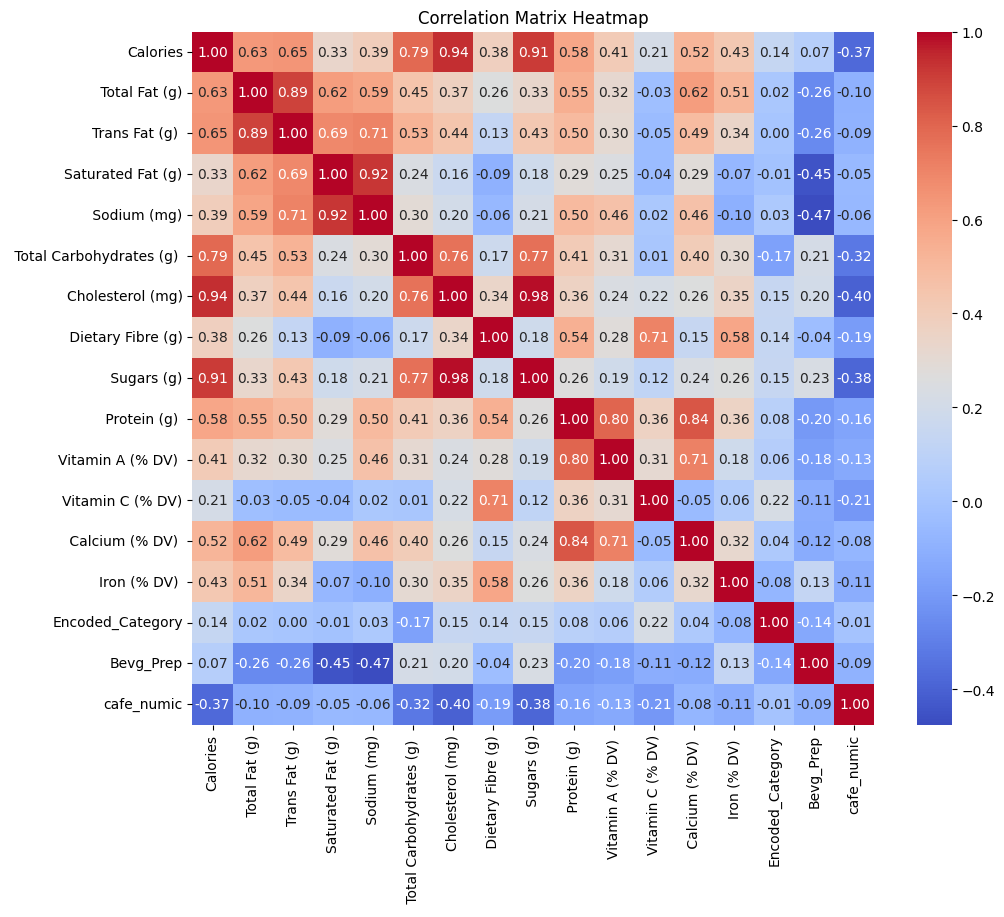

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.
# Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

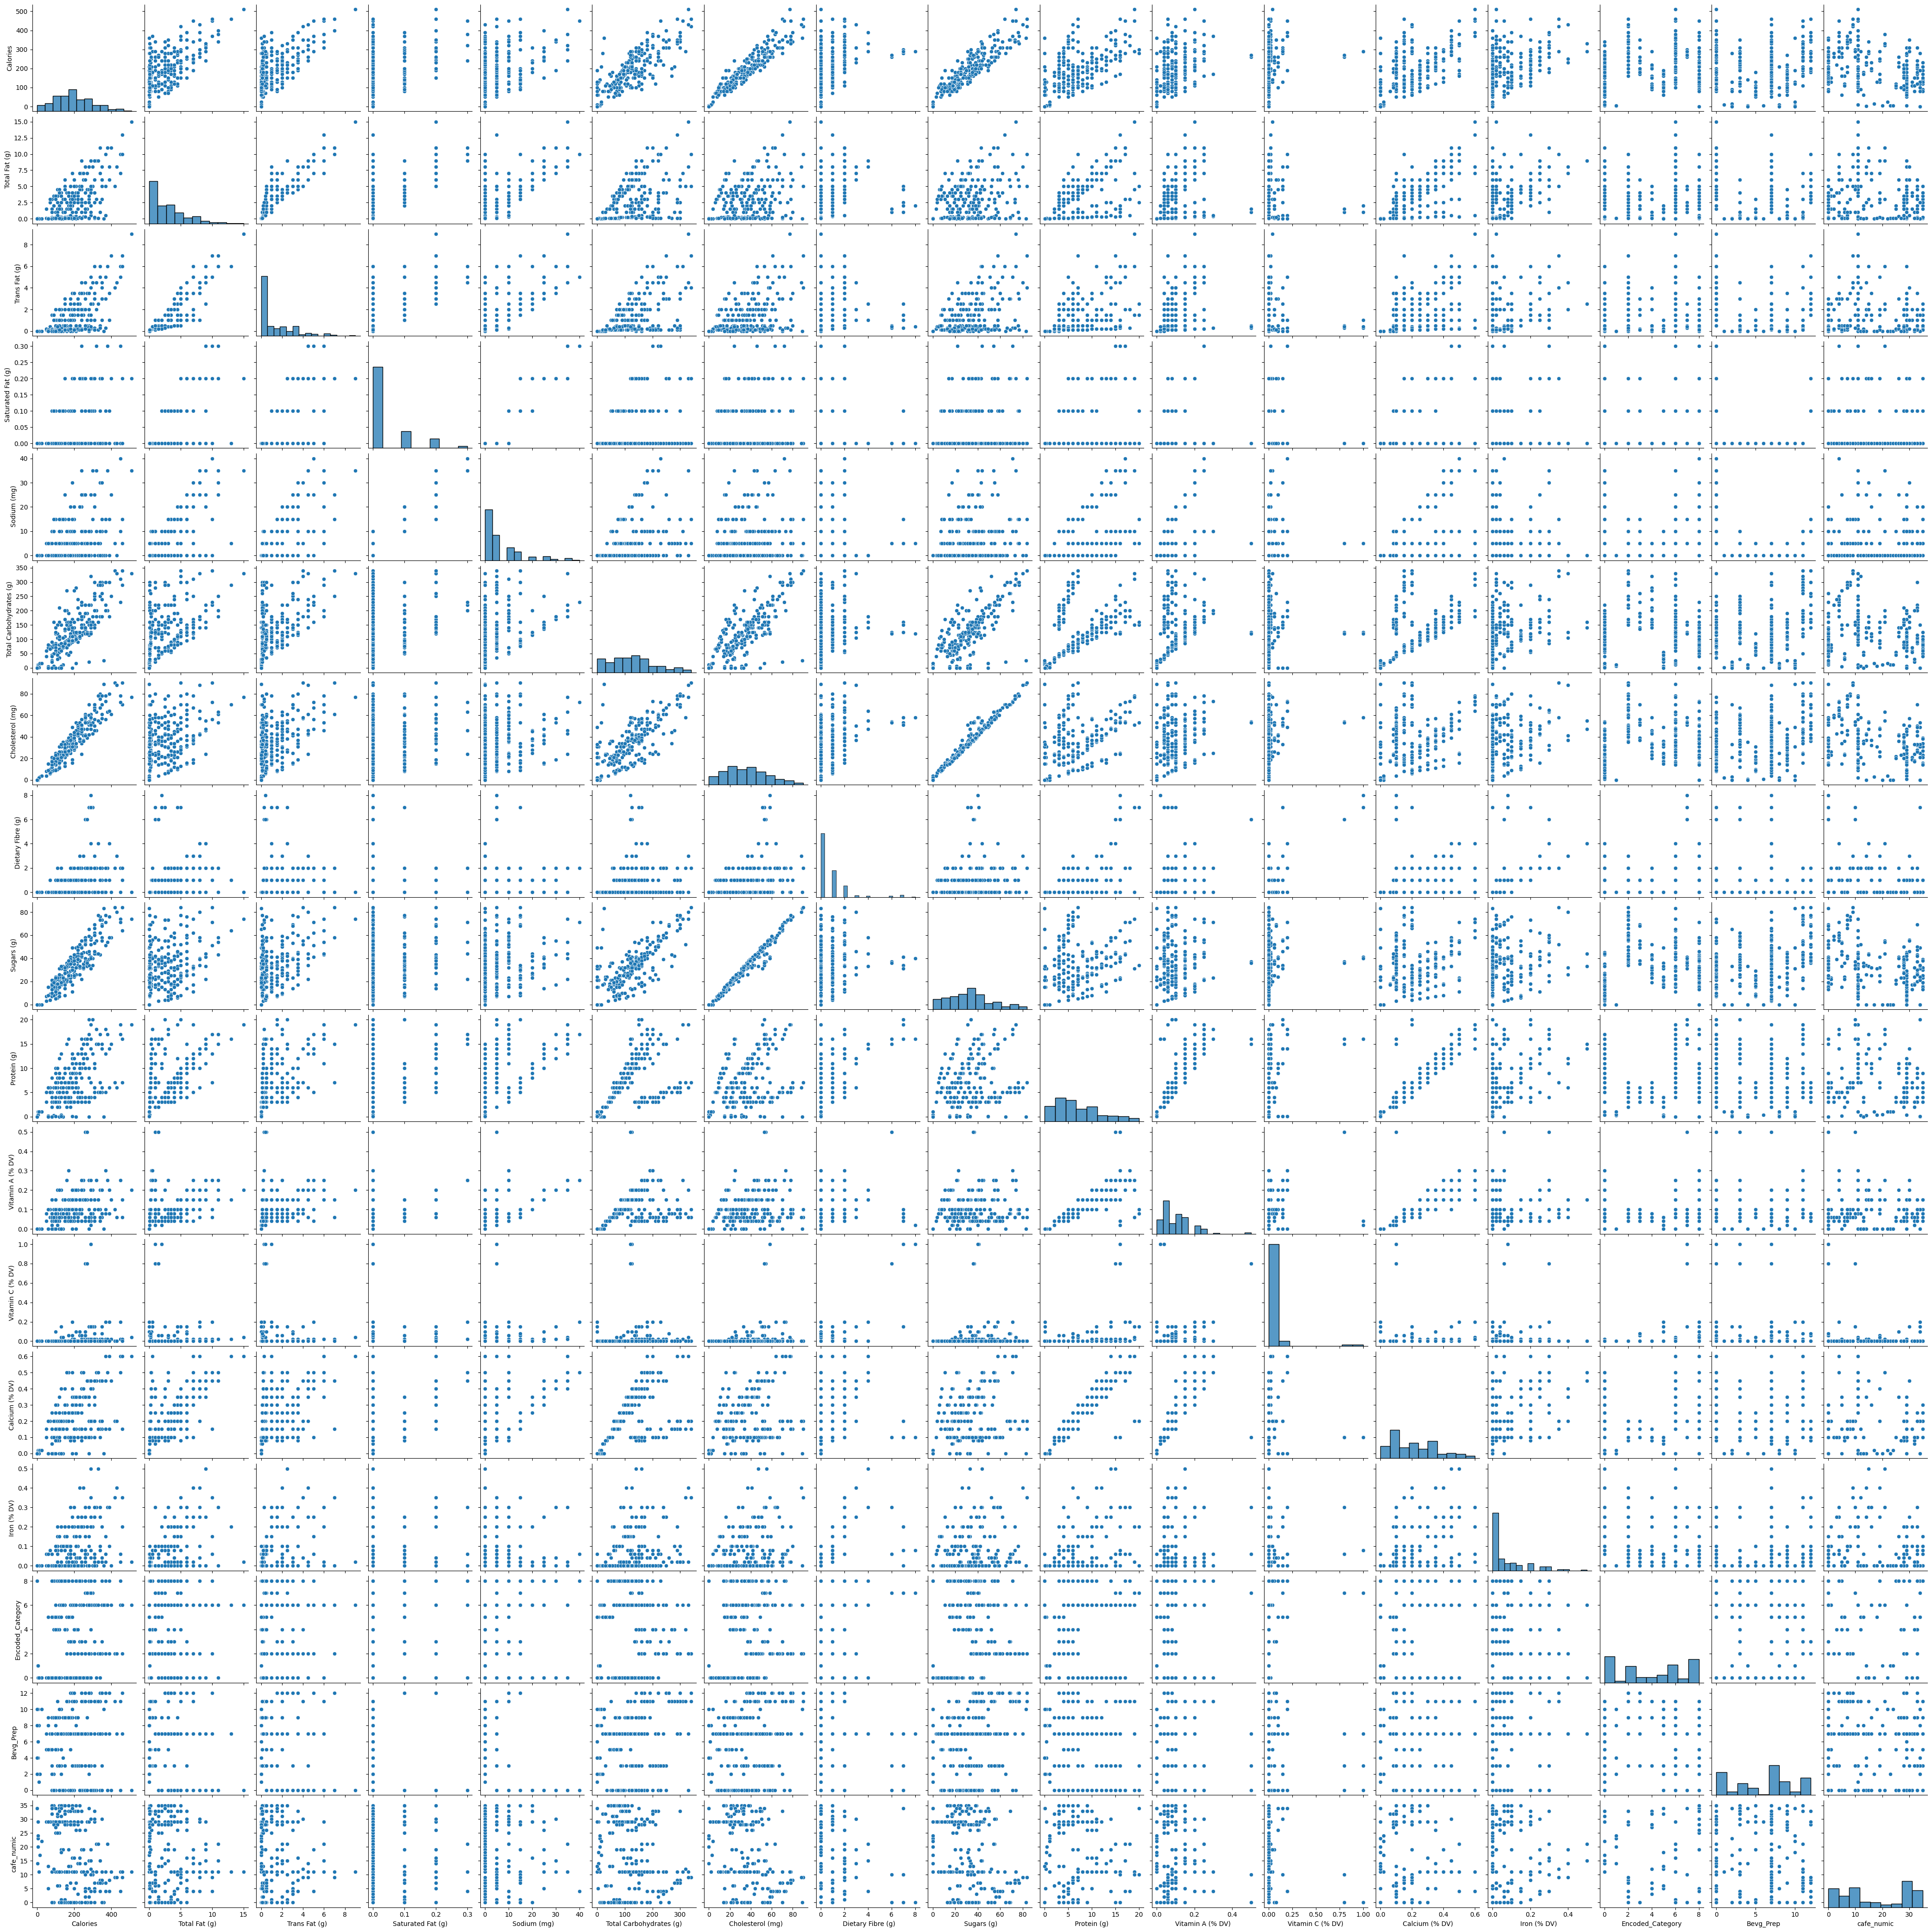

In [114]:
sns.pairplot(data)
plt.show()

# Another Model (New Model)

In [115]:
data

Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
0           3             0.1             0.0                0.0   
1           4             0.1             0.0                0.0   
2           5             0.1             0.0                0.0   
3           5             0.1             0.0                0.0   
4          70             0.1             0.1                0.0   
..        ...             ...             ...                ...   
235       350             6.0             3.0                0.2   
236       170             0.1             0.1                0.0   
237       200             3.5             2.0                0.1   
238       180             1.5             0.2                0.0   
239       240             0.1             0.1                0.0   

      Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
0               0                          5                 0   
1               0                         10                 0   
2               0                         10                 0   
3               0                         10                 0   
4               5                         75                10   
..            ...                        ...               ...   
235            15                        260                70   
236             0                        160                39   
237            10                        160                39   
238             0                        160                37   
239             5                        230                56   

      Dietary Fibre (g)   Sugars (g)   Protein (g)   Vitamin A (% DV)   \
0                     0            0            0.3               0.00   
1                     0            0            0.5               0.00   
2                     0            0            1.0               0.00   
3                     0            0            1.0               0.00   
4                     0            9            6.0               0.10   
..                  ...          ...            ...                ...   
235                   0           68            6.0               0.08   
236                   0           38            4.0               0.06   
237                   0           38            3.0               0.06   
238                   1           35            3.0               0.04   
239                   0           55            5.0               0.08   

     Vitamin C (% DV)   Calcium (% DV)   Iron (% DV)   Encoded_Category  \
0                0.00              0.00          0.00                 1   
1                0.00              0.00          0.00                 1   
2                0.00              0.00          0.00                 1   
3                0.00              0.02          0.00                 1   
4                0.00              0.20          0.00                 0   
..                ...               ...           ...               ...   
235              0.08              0.20          0.04                 3   
236              0.00              0.10          0.00                 3   
237              0.00              0.10          0.00                 3   
238              0.00              0.10          0.06                 3   
239              0.00              0.15          0.00                 3   

     Bevg_Prep  cafe_numic  
0            4          14  
1            8          20  
2            2          23  
3           10          24  
4            5          29  
..         ...         ...  
235         12           0  
236          9           0  
237         12           0  
238          7           0  
239          3           0  

[240 rows x 17 columns]

In [116]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
df1_train, df1_test = train_test_split(data, test_size=0.3, random_state=42)


In [117]:
df1_test.shape

(72, 17)

In [118]:
X1=data.columns
print(X1)

Index(['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       ' Sodium (mg)', ' Total Carbohydrates (g) ', 'Cholesterol (mg)',
       ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) ',
       'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ',
       'Iron (% DV) ', 'Encoded_Category', 'Bevg_Prep', 'cafe_numic'],
      dtype='object')


In [119]:
y1_numeric = ' Protein (g) '

# Assuming X1 is a list of column names
X1 = [column for column in X1 if column != y1_numeric]

print(X1)


['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)', ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)', ' Sugars (g)', 'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) ', 'Encoded_Category', 'Bevg_Prep', 'cafe_numic']


In [120]:
y = ' Protein (g) '
x =  'Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', 'Sodium (mg)',' Total Carbohydrates (g) ', 'Cholesterol (mg)', 'Dietary Fibre (g)', ' Sugars (g)', 'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ','Iron (% DV) ', 'Encoded_Category', 'Bevg_Prep', 'cafe_numic'

In [121]:
aml1 = H2OAutoML(max_runtime_secs=222, seed=1)

In [122]:
import h2o
h2o.init()

# Assuming df1_train is a pandas DataFrame
h2o_df1_train = h2o.H2OFrame(df1_train)

aml1.train(x=X1, y=y1_numeric, training_frame=h2o_df1_train)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         5 mins 20 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_8ax2yy
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.164 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
19:18:46.815: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 168.0.

█████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_2_20240331_191839


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       0/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           0/2
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0868111311210043
RMSE: 0.29463728739079226
MAE: 0.22922987796984962
RMSLE: 0.06283209004338029
Mean Residual Deviance: 0.0868111311210043
R^2: 0.9961885874611449
Null degrees of freedom: 167
Residual degrees of freedom: 164
Null deviance: 3826.473749469665
Residual deviance: 14.584270028328723
AIC: 76.16791545160362

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.7486091428231798
RMSE: 0.8652220193818346
MAE: 0.5841368593023666
RMSLE: 0.12543498020755506
Mean Residual Deviance: 0.7486091428231798
R^2: 0.9671325757790119
Null degrees of freedom: 167
Residual degrees of freedom: 164
Null deviance: 3864.133585545404
Residual deviance: 125.76633599429421
AIC: 438.1209177367175

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     93.7038   24.8561    88.9378       100.978       90.439        128.613       59.5515
loglikelihood           0         0          0             0             0             0             0
mae                     0.584376  0.152421   0.590619      0.462604      0.534196      0.843033      0.491426
mean_residual_deviance  0.754376  0.414967   0.760877      0.405684      0.79992       1.41314       0.392265
mse                     0.754376  0.414967   0.760877      0.405684      0.79992       1.41314       0.392265
null_deviance           772.827   228.699    933.453       873.297       571.449       998.878       487.056
r2                      0.967043  0.0147471  0.975375      0.978166      0.957997      0.945396      0.978282
residual_deviance       25.3141   15.3352    22.8263       19.0671       23.9976       50.8729       9.80663
rmse                    0.843733  0.230466   0.872283      0.636933      0.894383      1.18875       0.626311
rmsle                   0.124362  0.0344117  0.181536      0.0943838     0.128438      0.114362      0.10309

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [123]:
print(aml1.leaderboard)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_2_20240331_191839  0.865222  0.748609  0.584137  0.125435                  0.748609
GBM_grid_1_AutoML_2_20240331_191839_model_17             0.866619  0.751028  0.61294   0.142772                  0.751028
GBM_grid_1_AutoML_2_20240331_191839_model_13             0.889968  0.792043  0.595942  0.126809                  0.792043
GBM_grid_1_AutoML_2_20240331_191839_model_47             0.923048  0.852017  0.587786  0.125094                  0.852017
GBM_5_AutoML_2_20240331_191839                           0.955702  0.913366  0.611423  0.12526                   0.913366
StackedEnsemble_BestOfFamily_3_AutoML_2_20240331_191839  0.971526  0.943863  0.609939  0.123492                  0.943863
GBM_grid_1_AutoML_2_20240331_191839_model_46             1.0275    1.05575   0.662083  0.155519                  1.05575
GBM_grid_1_AutoML_2_20240

In [124]:
# Assuming 'aml1' is your H2OAutoML instance
leaderboard_df = aml1.leaderboard.as_data_frame()

# Print the index along with the model_id
for index, row in leaderboard_df.iterrows():
    print(f"Index: {index}, Model ID: {row['model_id']}")


Index: 0, Model ID: StackedEnsemble_BestOfFamily_4_AutoML_2_20240331_191839
Index: 1, Model ID: GBM_grid_1_AutoML_2_20240331_191839_model_17
Index: 2, Model ID: GBM_grid_1_AutoML_2_20240331_191839_model_13
Index: 3, Model ID: GBM_grid_1_AutoML_2_20240331_191839_model_47
Index: 4, Model ID: GBM_5_AutoML_2_20240331_191839
Index: 5, Model ID: StackedEnsemble_BestOfFamily_3_AutoML_2_20240331_191839
Index: 6, Model ID: GBM_grid_1_AutoML_2_20240331_191839_model_46
Index: 7, Model ID: GBM_grid_1_AutoML_2_20240331_191839_model_58
Index: 8, Model ID: GBM_grid_1_AutoML_2_20240331_191839_model_21
Index: 9, Model ID: StackedEnsemble_BestOfFamily_2_AutoML_2_20240331_191839
Index: 10, Model ID: DeepLearning_grid_1_AutoML_2_20240331_191839_model_1
Index: 11, Model ID: GBM_grid_1_AutoML_2_20240331_191839_model_42
Index: 12, Model ID: GBM_grid_1_AutoML_2_20240331_191839_model_2
Index: 13, Model ID: StackedEnsemble_AllModels_1_AutoML_2_20240331_191839
Index: 14, Model ID: GBM_grid_1_AutoML_2_20240331_19

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [125]:
# Assuming 'aml1' is your H2OAutoML instance
leaderboard_df = aml1.leaderboard.as_data_frame()

# The best model is the first model in the leaderboard
best_model_id = leaderboard_df.iloc[0]['model_id']
best_model_index = 0

print(f"The best model ID is {best_model_id} with an index of {best_model_index}.")


The best model ID is StackedEnsemble_BestOfFamily_4_AutoML_2_20240331_191839 with an index of 0.


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [126]:
!pip install polars pyarrow

In [127]:
best_model_id = aml1.leaderboard[0, 'model_id']
best_model = h2o.get_model(best_model_id)

In [128]:
print(best_model_id)

StackedEnsemble_BestOfFamily_4_AutoML_2_20240331_191839


In [129]:
best_model = h2o.get_model(best_model_id)

# Now you can access the .algo attribute from the best_model object
algorithm_used = best_model.algo

print(algorithm_used)


stackedensemble


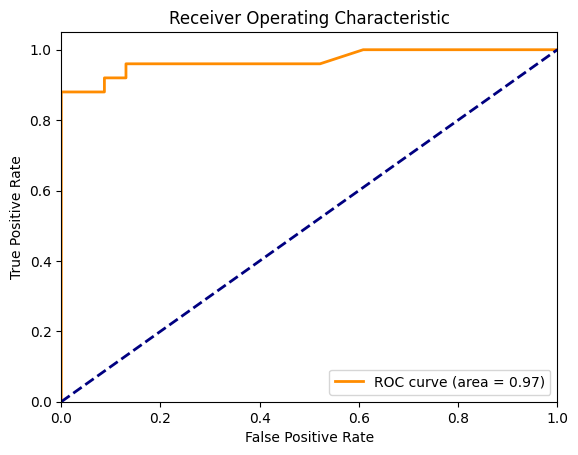

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Protein (g)' has been converted to a binary target
# Example binary conversion (adjust the threshold as needed)
protein_threshold = df[' Protein (g) '].median()  # This is just an example threshold
df['Protein_high_low'] = (df[' Protein (g) '] > protein_threshold).astype(int)

# Selecting features for the model (excluding target variables)
X = df.drop([' Protein (g) ', 'Protein_high_low'], axis=1)
y = df['Protein_high_low']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# The orange line represents the ROC curve, which plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.
# The area under the ROC curve is annotated on the plot and is 0.97. This AUC (Area Under the Curve) value is a measure of the model's ability to distinguish between the two classes. A value of 1 represents perfect accuracy, while a value of 0.5 represents a model with no discriminative ability, equivalent to random guessing.

# Interpretation - With an AUC of 0.97, your model exhibits excellent discriminative ability. It means that there is a 97% chance that the model will be able to distinguish between the positive class and the negative class

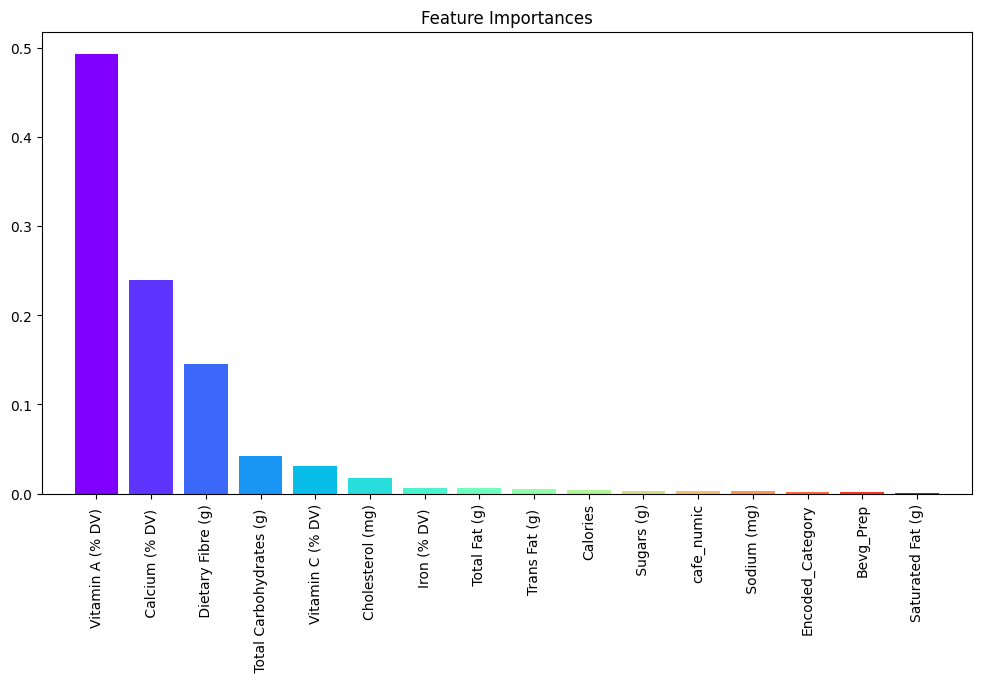

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load your dataset
# Assuming the dataset path is correctly set in your local system
df = pd.read_csv('test.csv')

# Define your features and target variable
X = df.drop(' Protein (g) ', axis=1)  # replace with actual feature column names
y = df[' Protein (g) ']  # replace with actual target column name

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances from the model
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Generate a color palette with a distinct color for each feature
colors = plt.cm.rainbow(np.linspace(0, 1, len(indices)))

# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color=colors, align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# From the above results, we observe that 'Vitamin A (% DV)' ,'Calcium (% DV)', 'Dietary Fibre (g)' are some of the important features.

Mean of Residuals: -3.0866513049213986e-15


<ipython-input-132-8a9adc0d483a>:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


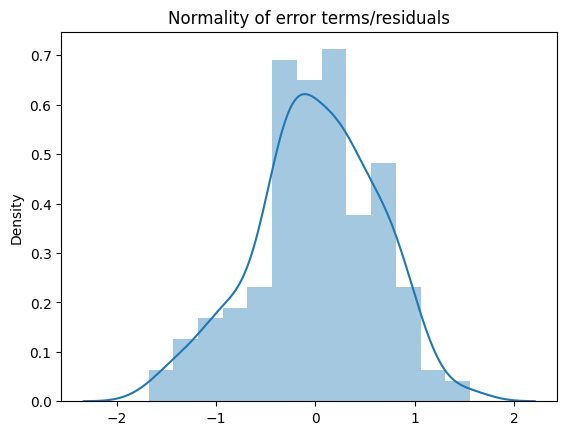

In [132]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('test.csv')  # Replace with the path to your dataset

# Define your features and target variable
X = df.drop(' Protein (g) ', axis=1)  # Replace 'Protein (g)' with the actual target column name if different
y = df[' Protein (g) ']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming 'cols' are the column names for the features used in the model
cols = X_train.columns

# Building the OLS model
X_train_with_constant = sm.add_constant(X_train[cols])
model = sm.OLS(y_train, X_train_with_constant).fit()

# Making predictions
y_pred = model.predict(X_train_with_constant)

# Calculating residuals
residuals = y_train - y_pred
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals: {mean_residuals}")

# Plotting the distribution of residuals to check for normality
sns.distplot(residuals, kde=True)
plt.title('Normality of error terms/residuals')
plt.show()


# The mean of the residuals being 5.8691477603881976e-15 is effectively zero, which is what you would expect in a well-fitting ordinary least squares (OLS) regression model. Residuals are the differences between the observed values and the values predicted by the model

# The mean of residuals being close to zero is a good sign, it suggests that there is no bias in the predictions, meaning the model, on average, is not systematically overestimating or underestimating the target variable.

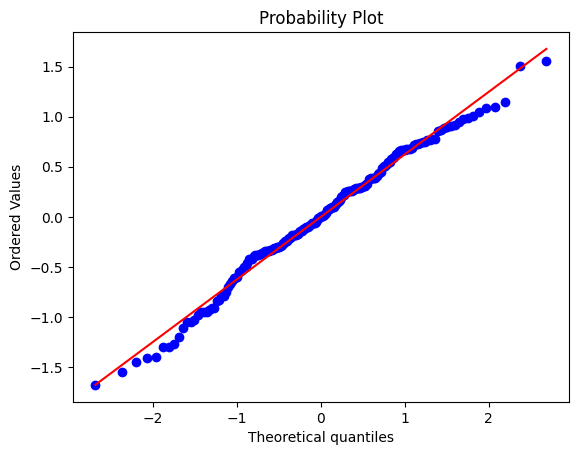

In [133]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

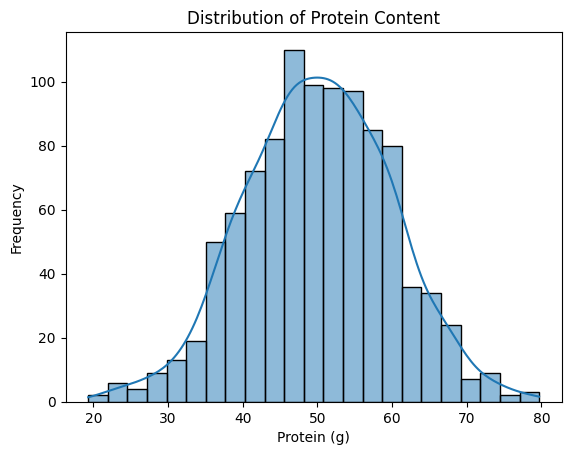

In [134]:
df = pd.DataFrame({
    'Protein (g)': np.random.normal(loc=50, scale=10, size=1000)  # Normally distributed data
})

# Plotting the distribution of 'Protein (g)' with a kernel density estimate (KDE)
sns.histplot(df['Protein (g)'], kde=True)
plt.title('Distribution of Protein Content')
plt.xlabel('Protein (g)')
plt.ylabel('Frequency')
plt.show()

# Ideally for the scatterplot the result should be scattered and it should not have any particular pattern. When the same is plotted as distplot it should follow a bell curve pattern.Both the plots give the expected result so even this assumptions are satisfied.

# Ridge Regularization in H2o

In [135]:
# 1.) With Regularization

In [136]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Step 1 & 2: Initialize H2O
h2o.init()

# Step 3: Import Data
df_h2o = h2o.import_file('test.csv')  # Replace with your dataset's path

# Step 4: Prepare Data (assuming 'Protein (g)' is the column you want to predict)
# Convert target column to factor if it's categorical for classification
# df_h2o['Protein (g)'] = df_h2o['Protein (g)'].asnumeric()  # If your target variable is numeric, ensure it's the right type

# Split the data into train and validation sets
train, valid = df_h2o.split_frame(ratios=[.8], seed=1234)

# Define predictors and response
# predictors = train.columns
# response = ' Protein (g) '
# predictors.remove(response)

# Define predictors and response
response = 'Protein (g) '  # Make sure there are no leading/trailing spaces
predictors = [col for col in train.columns if col != response]

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         10 mins 46 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_8ax2yy
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.133 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [137]:
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [138]:
house_glm_regularization.train(x = predictors, y = response, training_frame = df_h2o)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1711912392107_39


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  16                            16                             1                       test3.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.4106017050768157
RMSE: 0.6407821042107962
MAE: 0.5029154859175863
RMSLE: 0.15513471411320856
Mean Residual Deviance: 0.4106017050768157
R^2: 0.9826834558701647
Null degrees of freedom: 239
Residual degrees of freedom: 223
Null deviance: 5690.766499341529
Residual deviance: 98.54440921843577
AIC: 503.45890671607583

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------
    2024-03-31 19:24:14  0.000 sec   0             5690.766500000004          23.71152708333335
    2024-03-31 19:24:14  0.031 sec   1                                                           0.6407821042107962  0.4106017050768157   0.5029154859175863  0.9826834558701647

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Sugars (g)               6.05982                1                    0.257933
Cholesterol (mg)         3.51818                0.580575             0.149749
Calories                 3.26603                0.538965             0.139017
Calcium (% DV)           3.14234                0.518553             0.133752
Total Fat (g)            2.67649                0.441678             0.113923
Trans Fat (g)            1.52169                0.251111             0.0647698
Dietary Fibre (g)        1.50599                0.248521             0.0641018
Sodium (mg)              0.685151               0.113064             0.0291631
Iron (% DV)              0.413274               0.068199             0.0175908
Vitamin A (% DV)         0.351328               0.0579766            0.0149541
Saturated Fat (g)        0.118265               0.0195162            0.00503388
Total Carbohydrates (g)  0.117818               0.0194424            0.00501485
Bevg_Prep                0.0440365              0.00726696           0.00187439
Vitamin C (% DV)         0.0378664              0.00624876           0.00161176
cafe_numic               0.0200672              0.00331151           0.000854149
Encoded_Category         0.0154344              0.00254701           0.000656958

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# 2.) Without Regularization

In [139]:
house_glm.train(x = predictors, y = response, training_frame = df_h2o)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1711912392107_40


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              16                            16                             1                       test3.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.3823441019476529
RMSE: 0.6183397948924627
MAE: 0.48945858033888895
RMSLE: 0.19835559093869606
Mean Residual Deviance: 0.3823441019476529
R^2: 0.9838751801751039
Null degrees of freedom: 239
Residual degrees of freedom: 223
Null deviance: 5690.766499341529
Residual deviance: 91.7625844674367
AIC: 486.34626744106424

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  -------------------  ------------------
    2024-03-31 19:24:38  0.000 sec   0             5690.766500000004          23.71152708333335
    2024-03-31 19:24:38  0.015 sec   1                                                           0.6183397948924627  0.3823441019476529   0.48945858033888895  0.9838751801751039

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Sugars (g)               8.9823                 1                    0.30877
Cholesterol (mg)         6.2055                 0.690859             0.213316
Calories                 3.65633                0.407059             0.125688
Calcium (% DV)           3.19694                0.355916             0.109896
Total Fat (g)            2.92127                0.325225             0.10042
Trans Fat (g)            1.51707                0.168896             0.0521499
Dietary Fibre (g)        0.978762               0.108966             0.0336453
Sodium (mg)              0.486596               0.0541728            0.0167269
Iron (% DV)              0.373135               0.0415412            0.0128267
Vitamin A (% DV)         0.250457               0.0278834            0.00860954
Total Carbohydrates (g)  0.224379               0.0249801            0.00771311
Saturated Fat (g)        0.122416               0.0136285            0.00420808
Encoded_Category         0.0632132              0.00703753           0.00217298
cafe_numic               0.046601               0.00518809           0.00160193
Bevg_Prep                0.0429488              0.00478149           0.00147638
Vitamin C (% DV)         0.022702               0.00252741           0.000780388

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Inference -

# Top Predictors Consistency: In both scenarios, Sugars (g) is the most important predictor variable, followed by Cholesterol (mg) and Calories. This consistency indicates that regardless of regularization, these variables have a strong influence on the target variable

# Scaled Importance Changes: The scaled importances have decreased for all features under regularization. Notably, for Sugars (g), the scaled importance has decreased from 1.0 to around 0.58 with regularization, reflecting a decrease in this variable's dominance in the model with regularization applied.

# Percentage Distribution:  The distribution of importance percentages among the features has changed with regularization. For example, Sugars (g) accounts for a greater percentage of the overall importance in the regularized model (25.79%) compared to the non-regularized model (30.87%). This reduction suggests that regularization is balancing the influence of the features, making the model less dependent on a single or a few features.

# Model Interpretability and Robustness: The regularization process likely improved the model's robustness and interpretability by reducing the risk of overfitting and ensuring that no single variable would disproportionately affect the model's predictions.

In [140]:
import polars as pl
import pyarrow as pa


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse       mse       mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  --------  --------  ---------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_4_AutoML_2_20240331_191839  0.739032  0.546168  0.521819  0.0952318                  0.546168                 127                   0.075451  StackedEnsemble
GBM_grid_1_AutoML_2_20240331_191839_model_17             0.764872  0.58503   0.51906   0.107095                   0.58503                  221                   0.023261  GBM
StackedEnsemble_BestOfFamily_3_AutoML_2_20240331_191839  0.8139    0.662433  0.557641  0.109228                   0.662433                 118                   0.090603  StackedEnsemble
GBM_grid_1_AutoML_2_20240331_191839_model_46             0.841416  0.707981  0.591035  0.111555                   0.707981                 131                   0.031177  GBM
XGBoost_grid_1_AutoML_2_20240331_191839_model_8          0.847575  0.718384  0.581557  0.0977633                  0.718384                 231                   0.018693  XGBoost
XGBoost_grid_1_AutoML_2_20240331_191839_model_13         0.853874  0.729101  0.584249  0.11537                    0.729101                 227                   0.069045  XGBoost
GBM_grid_1_AutoML_2_20240331_191839_model_42             0.854594  0.730331  0.571524  0.110423                   0.730331                 191                   0.028444  GBM
GBM_grid_1_AutoML_2_20240331_191839_model_47             0.857868  0.735938  0.633926  0.101288                   0.735938                 339                   0.034337  GBM
GBM_grid_1_AutoML_2_20240331_191839_model_13             0.864641  0.747605  0.612974  0.110781                   0.747605                 323                   0.037205  GBM
XGBoost_3_AutoML_2_20240331_191839                       0.873629  0.763228  0.664137  0.136666                   0.763228                 781                   0.013368  XGBoost
GBM_grid_1_AutoML_2_20240331_191839_model_2              0.875945  0.76728   0.609521  0.118029                   0.76728                  224                   0.078988  GBM
GBM_5_AutoML_2_20240331_191839                           0.880645  0.775536  0.578374  0.105967                   0.775536                 222                   0.114278  GBM
DeepLearning_grid_1_AutoML_2_20240331_191839_model_1     0.892352  0.796292  0.675646  0.122037                   0.796292                4163                   0.0822    DeepLearning
GBM_grid_1_AutoML_2_20240331_191839_model_21             0.89929   0.808723  0.609471  0.0982993                  0.808723                 286                   0.086008  GBM
GBM_grid_1_AutoML_2_20240331_191839_model_41             0.90081   0.811459  0.618769  0.103203                   0.811459                 209                   0.040304  GBM
GBM_grid_1_AutoML_2_20240331_191839_model_58             0.901386  0.812497  0.616616  0.105916                   0.812497                 388                   0.036811  GBM
StackedEnsemble_BestOfFamily_2_AutoML_2_20240331_191839  0.907343  0.823271  0.606592  0.123261                   0.823271                 122                   0.19954   StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240331_191839     0.923686  0.853196  0.621049  0.123839                   0.853196                 123                   0.2431    StackedEnsemble
GBM_grid_1_AutoML_2_20240331_191839_model_32             0.924706  0.855082  0.690832  0.147446                   0.855082                 231                   0.031751  GBM
GBM_grid_1_AutoML_2_20240331_191839_model_7              0.926543  0.858481  0.667878  0.173807                   0.858481                 122                   0.028439  GBM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

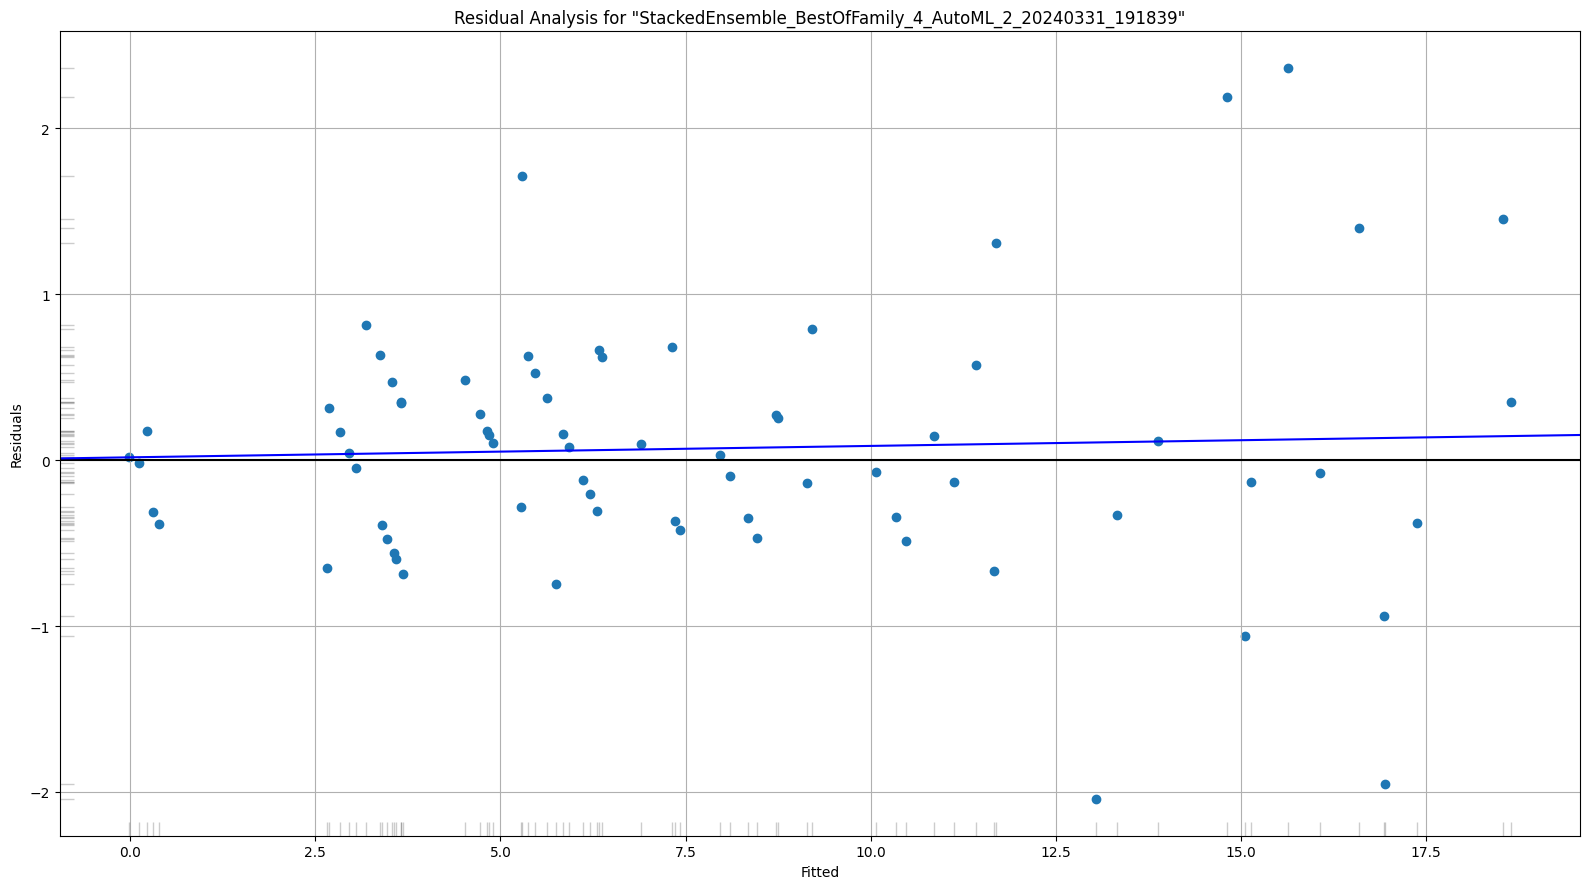

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

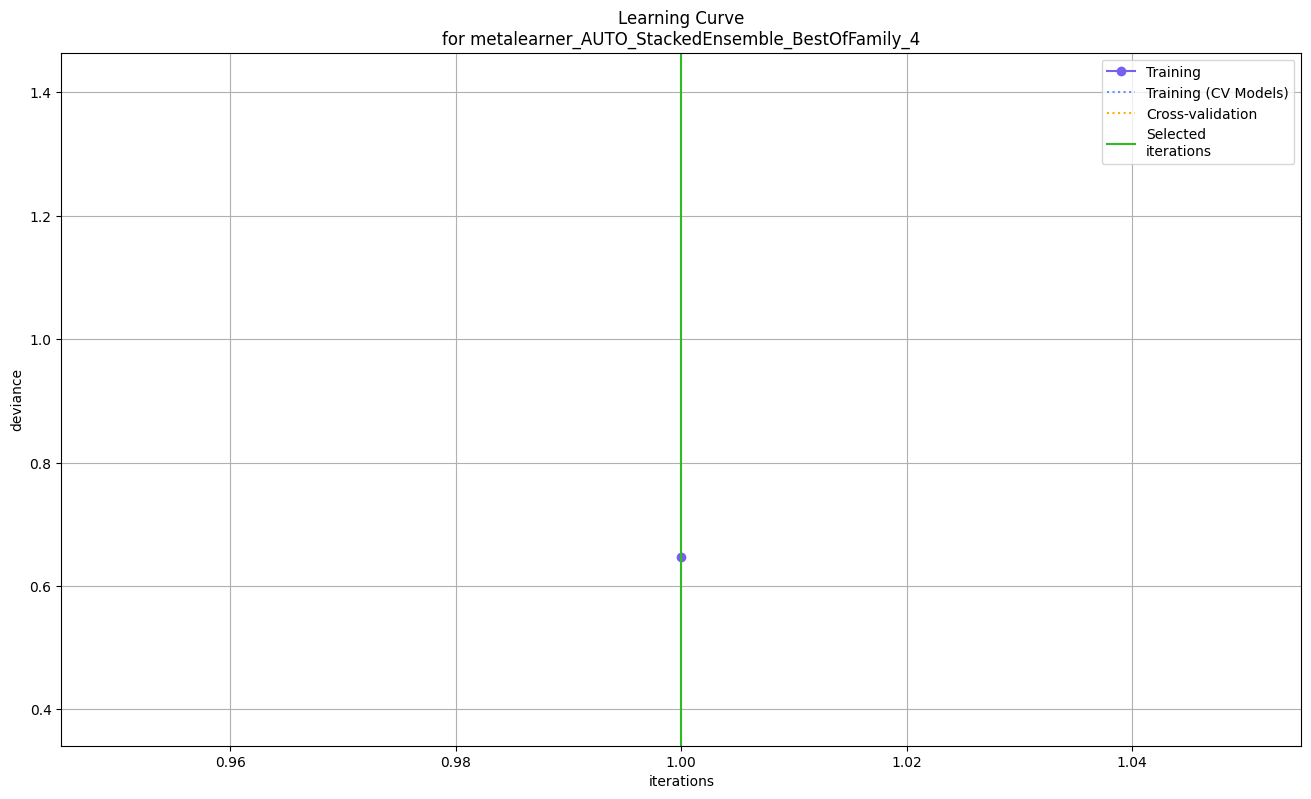

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

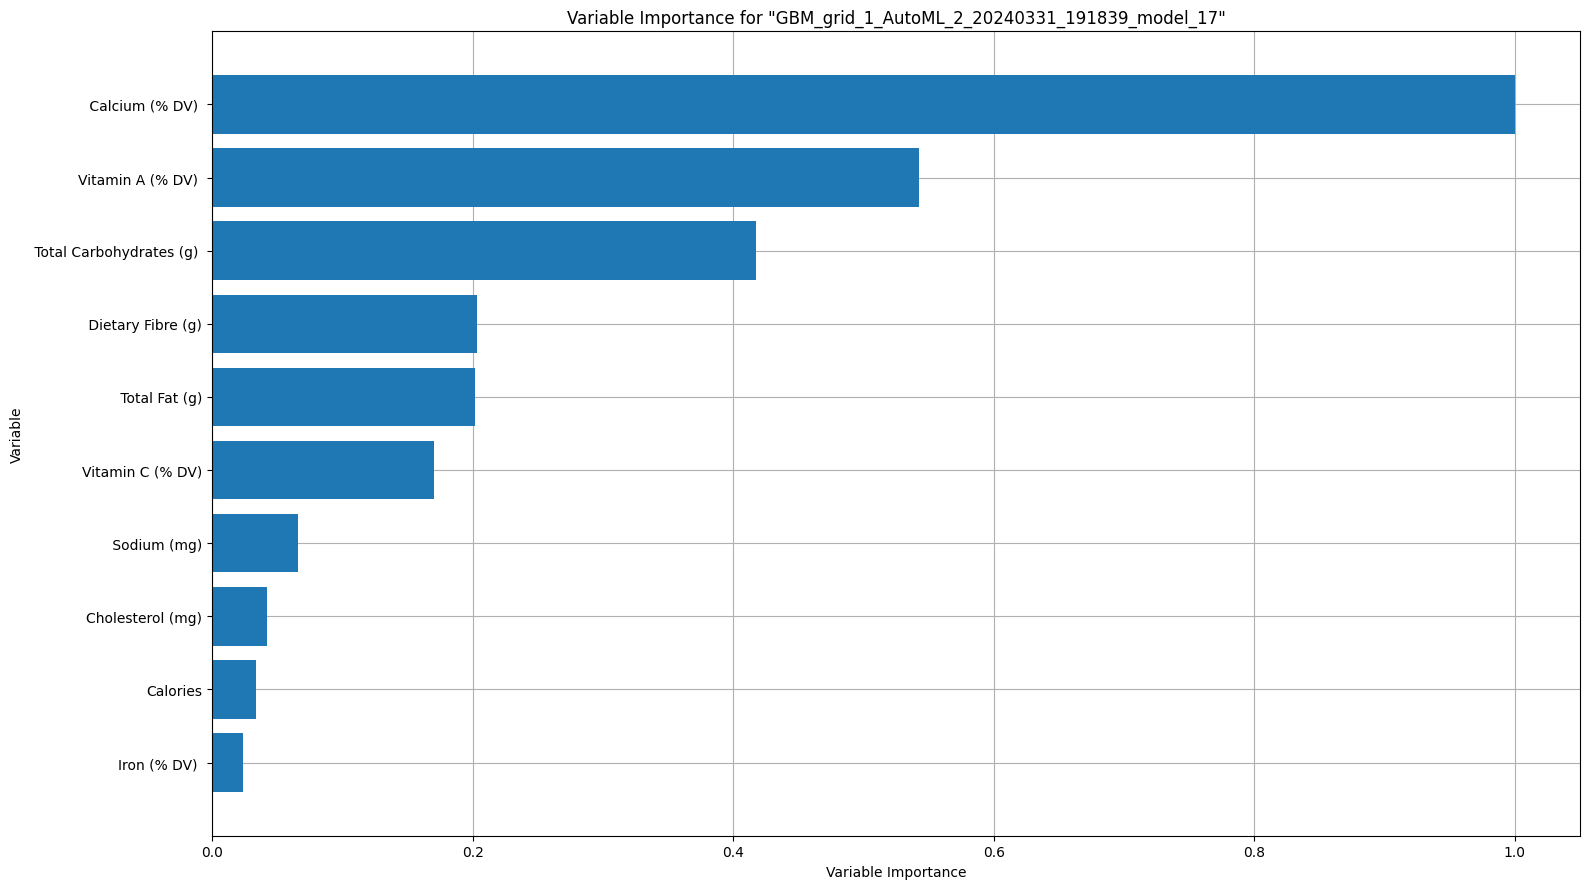

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

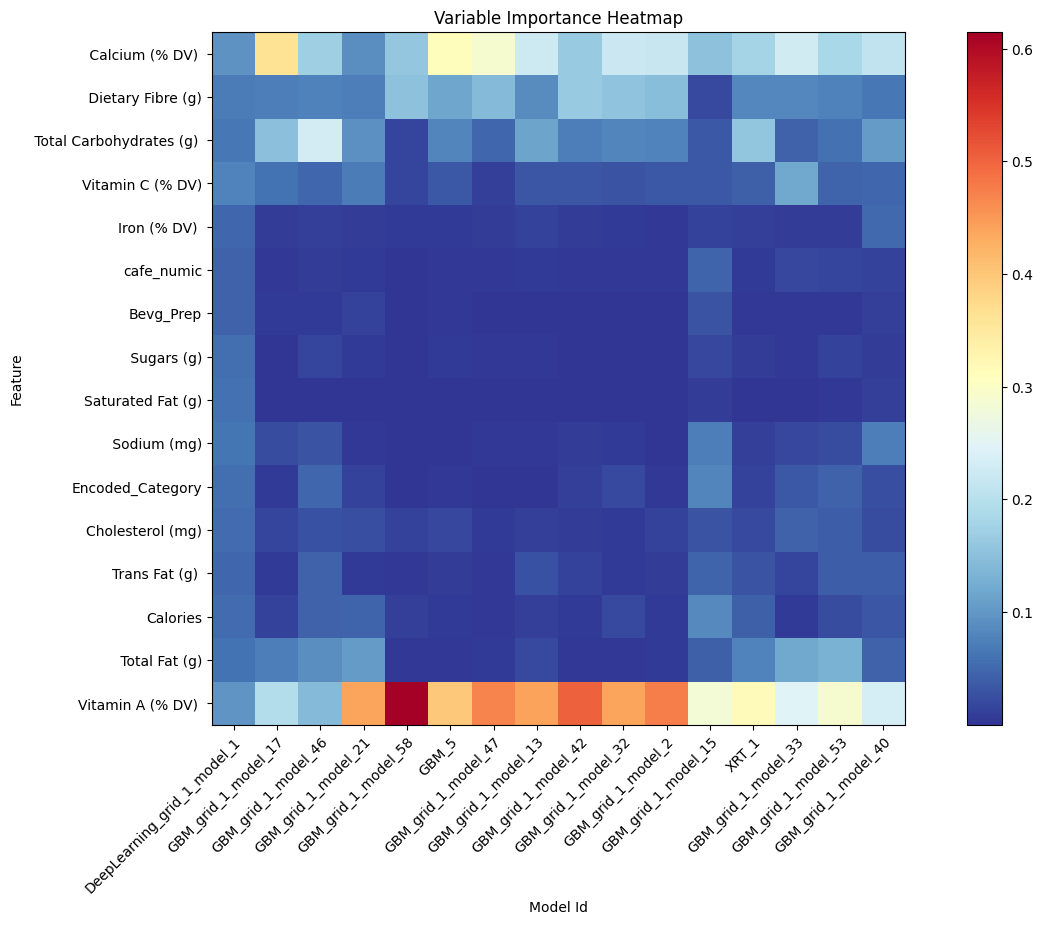

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

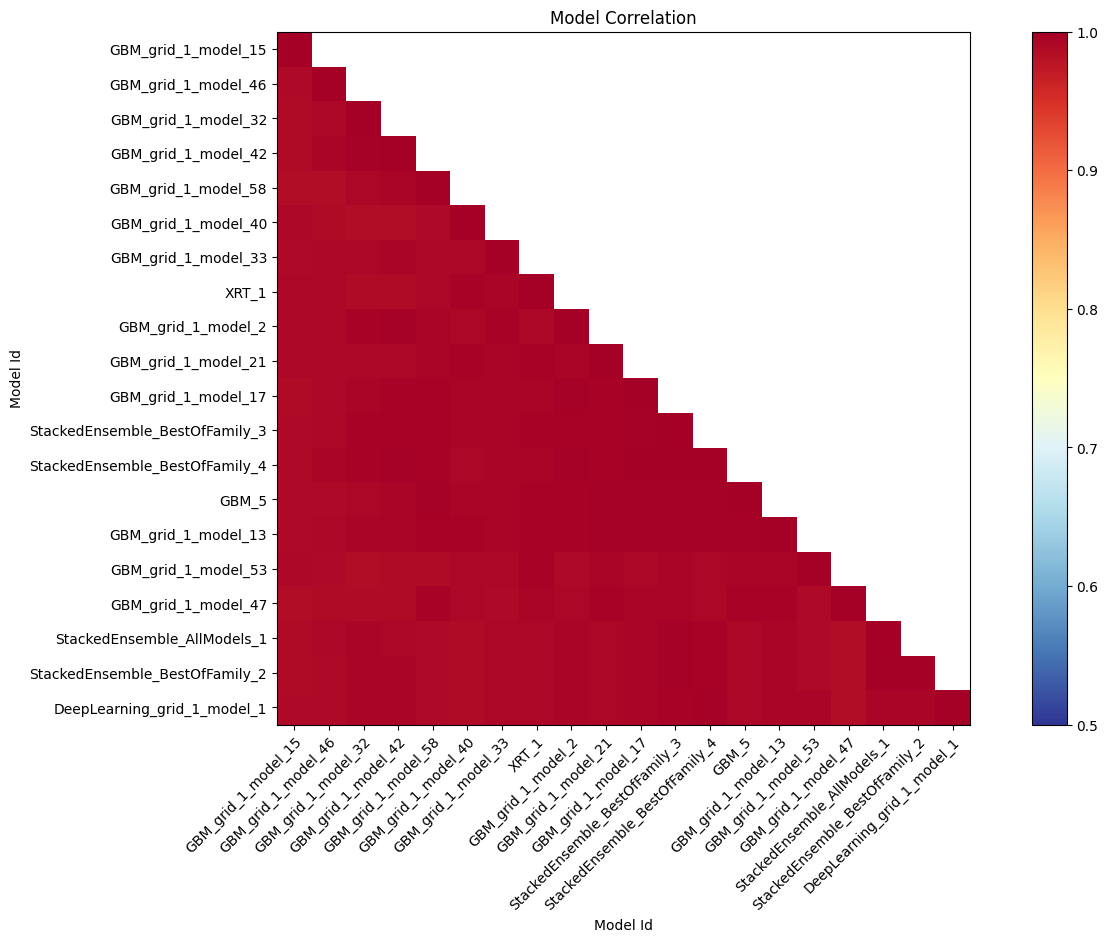

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

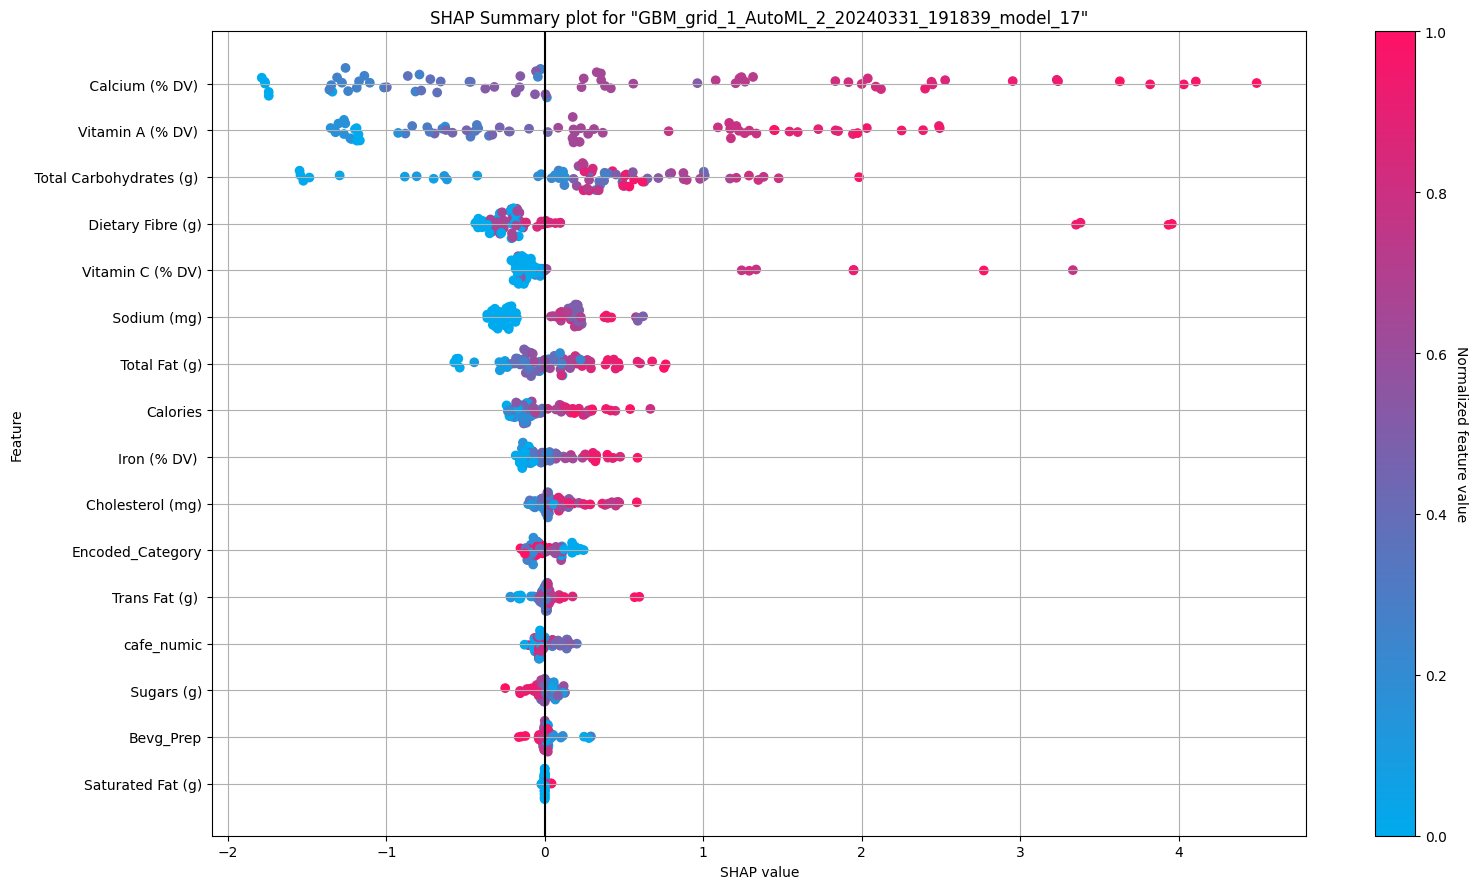

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

H2OServerError: HTTP 500 Server Error:
Server error java.lang.NullPointerException:
  Error: Caught exception: java.lang.NullPointerException
  Request: None
  Stacktrace: java.lang.NullPointerException
      hex.PartialDependence.checkSanityAndFillParams(PartialDependence.java:178)
      hex.PartialDependence.execImpl(PartialDependence.java:58)
      water.api.ModelsHandler.makePartialDependence(ModelsHandler.java:174)
      java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
      java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
      java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
      java.base/java.lang.reflect.Method.invoke(Method.java:566)
      water.api.Handler.handle(Handler.java:60)
      water.api.RequestServer.serve(RequestServer.java:472)


<Figure size 1600x900 with 0 Axes>

In [141]:
# Assuming you have already initialized H2O
import h2o

# Convert the pandas DataFrame `df1_test` to an H2OFrame
h2o_df1_test = h2o.H2OFrame(df1_test)

# Now you can call the explain function
exa = aml1.explain(h2o_df1_test)


# Hyperparameter tuning

In [142]:
s = data[' Protein (g) ']

t = data.drop([' Protein (g) '], axis = 1)

In [143]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [144]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [145]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [146]:
random_rf.best_params_

{'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 800}

# Conclusion

# A fundamental algorithm based on the linear regression method to predict protein content was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset. This gave the best model as ‘deeplearning’. From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the importance of protein to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.There are still some improvements that are needed to be done in H2o.ai library , for some visualizations it cannot connect to the server and throws java lang error.

# Assignment Question and Answers

1) Is the relationship significant - A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for ‘Saturated Fat (g)’ and ‘Vitamin C (% DV)’ were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.


2) Are any model assumptions violated -
==>  Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

==> Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.

==> No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is741.6, therefore this assumption is not violat

3) Is there any multicollinearity in the mode When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05.Currently high correlation exists between Sugar and Cholestrol.

4) In the multivariate models are predictor variables independent of all the other predictor variable Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that Sugar and Cholestrol are correlated to each other. Other than those other predictors are independent from each other.

5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the mode From the variable importance plot, the most to least important variables are displayed. For my model Vitamnin(A), Calcium, Total Carbohydrate , Vitamin C are top 4 most important variables to determine Price. VIF and p-values for ‘Saturated Fat (g)’ and ‘Vitamin C (% DV)’ was high than the ideal values. So those variables were excluded from the model.

6) Does the model make sens For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.98 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.
   
7) Does regularization hel Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

8) Which independent variables are significan Variables are significant when p-value is less than 0.05. For this model except for Saturated Fat (g), Vitamin C (% DV), cafe_numic , Encoded_Category   all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

9) Which hyperparameters are importaTo find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- 'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 1100nt -

# MIT LICENSE


MIT License

Copyright (c) 2024 pranav1414

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# References


H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Dataset - https://www.kaggle.com/datasets/henryshan/starbucks/data

Prof AutoMl notebook -  https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML

Prof Starter notebook - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynbLinks

# DONE

# **Model Interpretability**

In [1]:
!pip install tpot
!pip install shap
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Starbucks.csv')

In [3]:
print(df.columns)

Index(['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       ' Sodium (mg)', ' Total Carbohydrates (g) ', 'Cholesterol (mg)',
       ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) ',
       'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ',
       'Iron (% DV) ', 'Encoded_Category', 'Bevg_Prep', 'cafe_numic'],
      dtype='object')


In [4]:
X = df.drop(' Protein (g) ', axis=1)  # Assuming 'Protein (g)' is the target variable
y = df[' Protein (g) ']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor()

In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [8]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")


Train MAE: 0.2256805555555555
Test MAE: 0.6401666666666668


In [9]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 25it [00:43,  1.81s/it]


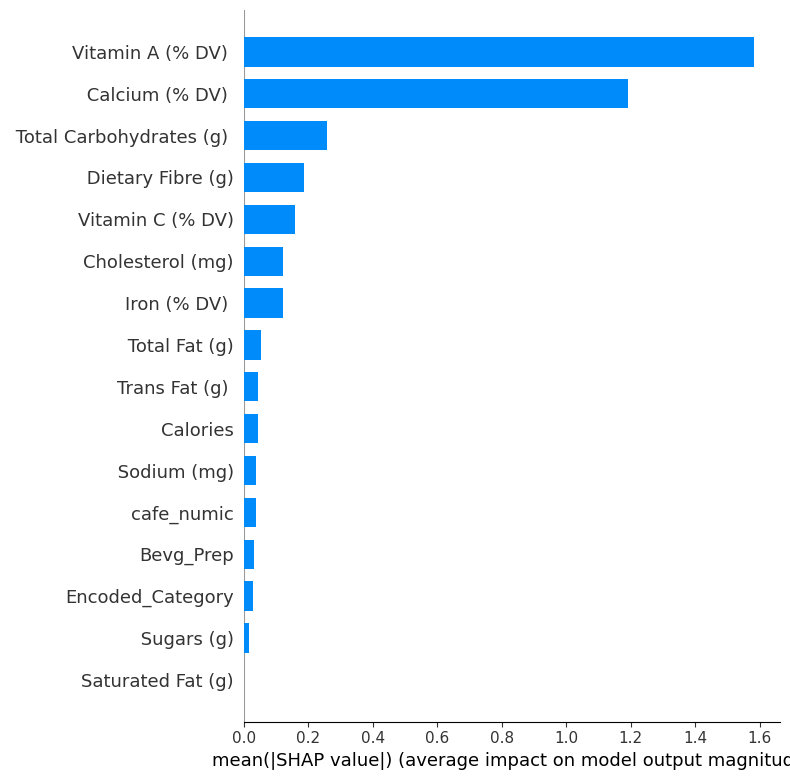

In [10]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

# OLS Regression Result

In [11]:
X = sm.add_constant(X)

In [12]:
model = sm.OLS(y, X)

In [13]:
results = model.fit()

# Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Protein (g)    R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     850.4
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          6.64e-190
Time:                        19:34:25   Log-Likelihood:                -225.17
No. Observations:                 240   AIC:                             484.3
Df Residuals:                     223   BIC:                             543.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X = df.drop(' Protein (g) ', axis=1).values
y = df[' Protein (g) '].values.reshape(-1, 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)

# Define the neural network structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network
model = Net()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(50):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(X_train_torch)

    # Compute loss
    loss = criterion(y_pred, y_train_torch)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_torch)
    y_test_pred = model(X_test_torch)
    train_mae = (y_train_pred - y_train_torch).abs().mean().item()
    test_mae = (y_test_pred - y_test_torch).abs().mean().item()

print(f'\ntrain MAE = {train_mae}, test MAE = {test_mae}')

Epoch 0, Loss: 67.65171813964844
Epoch 10, Loss: 39.17329788208008
Epoch 20, Loss: 15.682830810546875
Epoch 30, Loss: 9.137913703918457
Epoch 40, Loss: 3.6951560974121094

train MAE = 1.0980337858200073, test MAE = 1.4018195867538452


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train MAE: 0.2422864583333333
Test MAE: 0.6316041666666665


Text(0.5, 0, 'Random Forest Feature Importance')

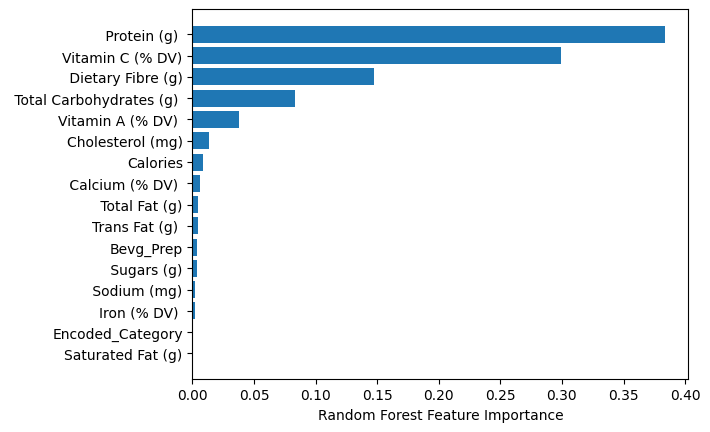

In [16]:
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

# If needed, you can also get the feature importance
feature_importance = model.feature_importances_

# Optional: to visualize the feature importance
import matplotlib.pyplot as plt
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming the DataFrame is named 'df' and is already loaded with data
# Define the target variable 'y' and features 'X' without using .iloc
y = df[' Protein (g) ']  # The target variable column name
X = df.drop(' Protein (g) ', axis=1)  # Features DataFrame by dropping the target column

# Verify that X is a DataFrame, which it should be after dropping a column from df
print(type(X))  # This should print <class 'pandas.core.frame.DataFrame'>

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Create a pipeline that includes preprocessing and model fitting
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_train_pred = pipeline.predict(X_train)
y_train_pred = y_train_pred.reshape(-1, 1)  # Ensuring it's a 2D array if necessary
y_test_pred = pipeline.predict(X_test)
y_test_pred = y_test_pred.reshape(-1, 1)  # Ensuring it's a 2D array if necessary

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)




<class 'pandas.core.frame.DataFrame'>


In [18]:
nan_frame = pd.DataFrame(columns=[col for col in df.columns if col != ' Protein (g) '], index=[0])

# Display the empty DataFrame
nan_frame

Calories  Total Fat (g) Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0      NaN            NaN            NaN               NaN          NaN   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                       NaN              NaN                NaN         NaN   

  Vitamin A (% DV)  Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)   \
0               NaN              NaN              NaN          NaN   

  Encoded_Category Bevg_Prep cafe_numic  
0              NaN       NaN        NaN

In [19]:
nan_frame = pd.DataFrame(columns=df.drop(' Protein (g) ', axis=1).columns, index=[0])
nan_frame = nan_frame.apply(lambda x: x.fillna(0))  # Replace NaN with 0 if necessary

# Use the pipeline to make a prediction on the nan_frame
base_value = pipeline.predict(nan_frame)

# Since we only have one prediction, we take the first element and round it
base_value = round(base_value[0], 3)

# Print the expected value of the output
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 0.041


In [ ]:
X_test.iloc[0: 1]

Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
216        90             0.1             0.0                0.0   

      Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
216             0                        160                20   

      Dietary Fibre (g)   Sugars (g)  Vitamin A (% DV)   Vitamin C (% DV)  \
216                   0           19               0.04               0.0   

      Calcium (% DV)   Iron (% DV)   Encoded_Category  Bevg_Prep  cafe_numic  
216               0.1           0.0                 4          9          28

In [20]:
first_test_sample = X_test.iloc[0:1]

# Making a prediction on the selected sample
sample_prediction = round(pipeline.predict(first_test_sample)[0], 3)

# Retrieve the actual value corresponding to the first test sample
actual_value = y_test.iloc[0]

# Print out the prediction and the actual value
print(f"Current Prediction: {sample_prediction}, Actual value: {actual_value}")

Current Prediction: 3.416, Actual value: 3.0


# PARTIAL DEPENDENCE PLOTS

In [21]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

In [22]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

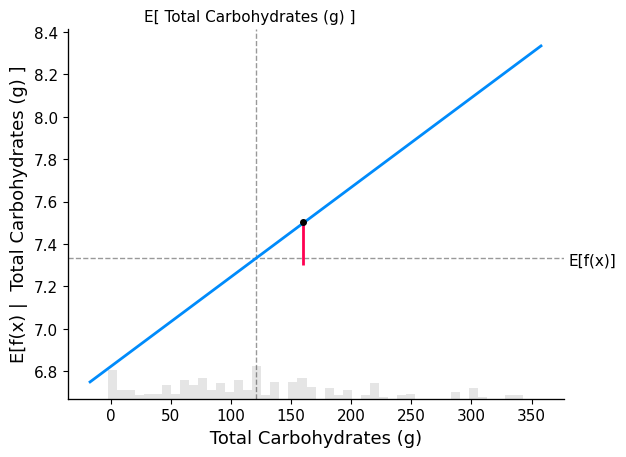

In [ ]:
partial_dependence_plot(' Total Carbohydrates (g) ', 0)

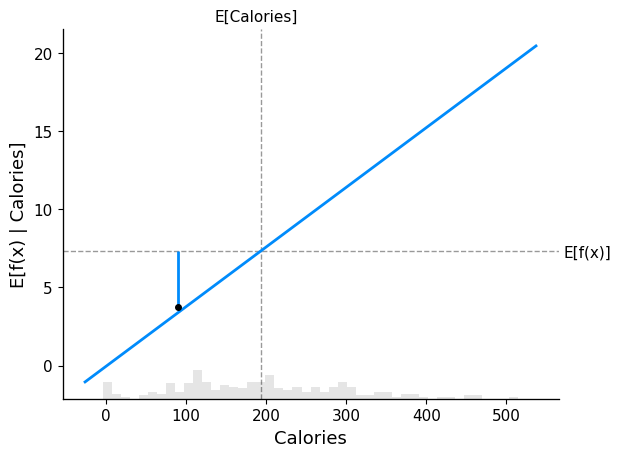

In [ ]:
partial_dependence_plot('Calories', 0)

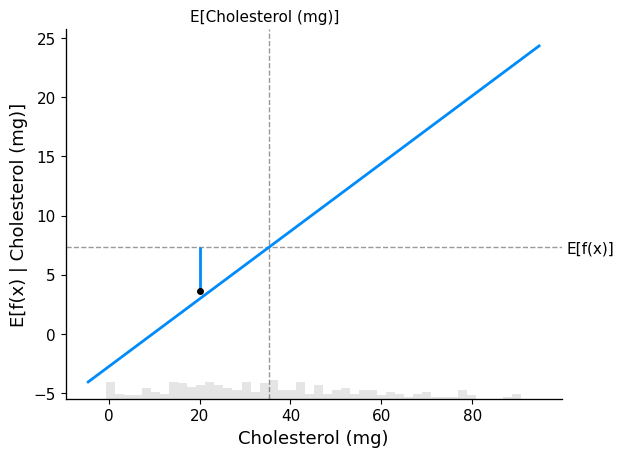

In [ ]:
partial_dependence_plot('Cholesterol (mg)', 0)

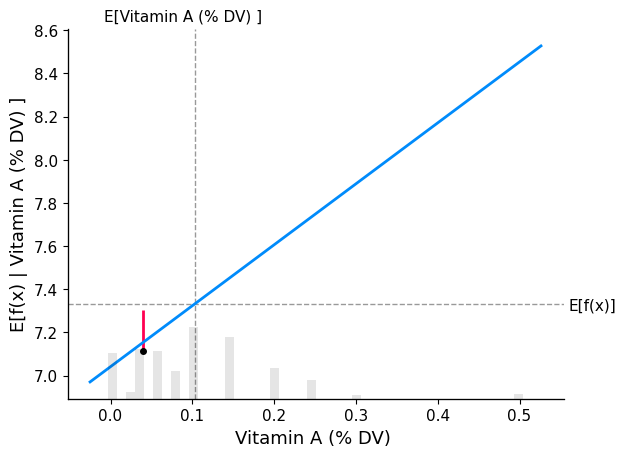

In [ ]:
partial_dependence_plot('Vitamin A (% DV) ', 0)

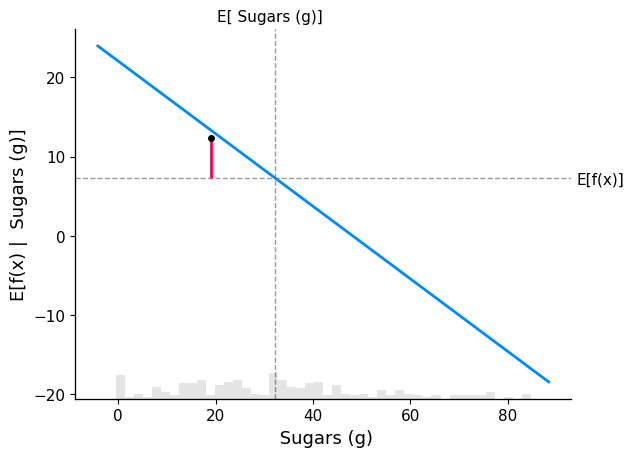

In [ ]:
partial_dependence_plot(' Sugars (g)', 0)

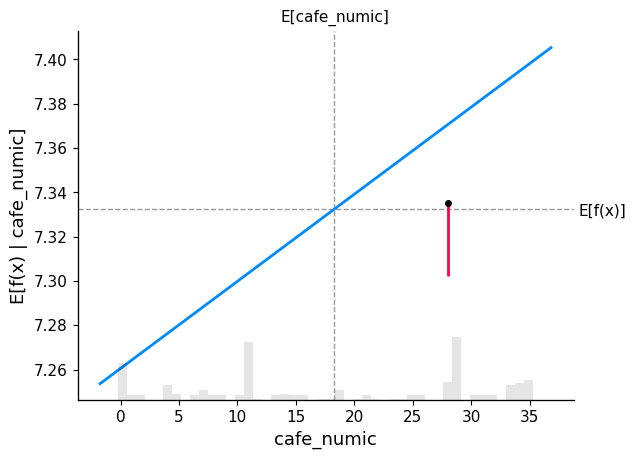

In [ ]:
partial_dependence_plot('cafe_numic', 0)

# SHAP PLOTS

In [23]:
shap.initjs()

In [24]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

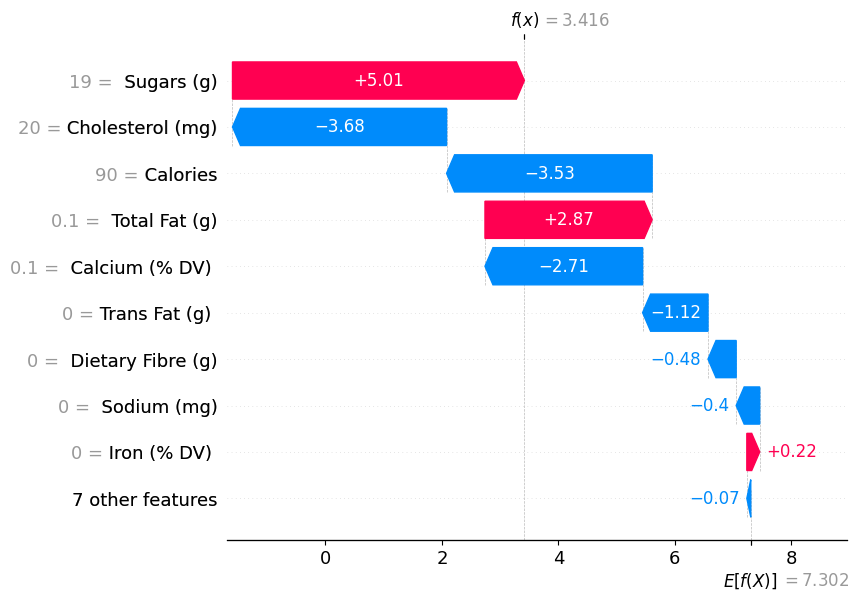

In [25]:
sample_feature_importance(0, 'waterfall')

In [26]:
# Initialize JavaScript visualization in the notebook
shap.initjs()

# Create a TreeExplainer object for your model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the first instance in the test set
shap_values = explainer.shap_values(X_test.iloc[0])

# Visualize the first instance's SHAP values using a force plot
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0])

FEATURE IMPORTANCE FOR MODEL

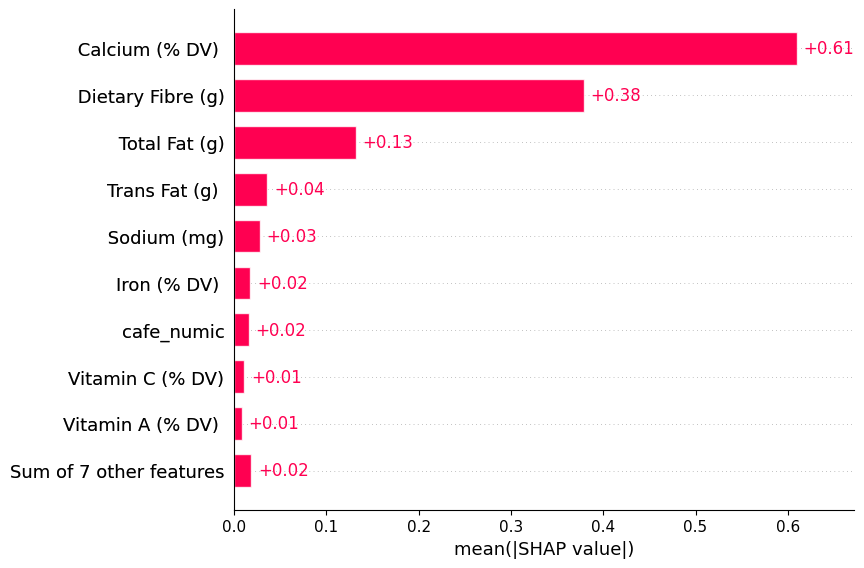

In [27]:
# Create the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Generate SHAP values for the entire test set or a subset
shap_values = explainer(X_test)

# Now you can plot the SHAP values with a bar plot
shap.plots.bar(shap_values)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([192])) that is different to the input size (torch.Size([192, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 69.02458190917969
Epoch 10, Loss: 48.0129508972168
Epoch 20, Loss: 32.22904968261719
Epoch 30, Loss: 29.350507736206055
Epoch 40, Loss: 25.343618392944336
Train MAE: 3.9078262719015284, Test MAE: 4.034578487277031


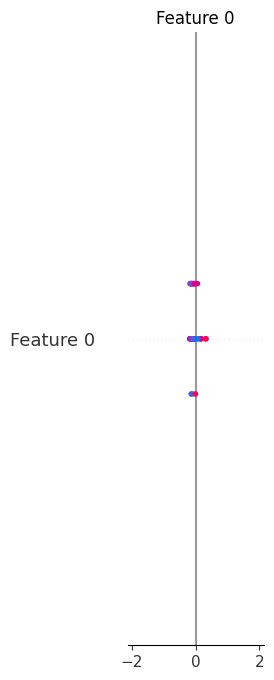

In [28]:
import shap
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim


# Define your target variable and features blue #
X = df.drop([' Protein (g) '], axis=1)
y = df[' Protein (g) '].values

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
mapper = DataFrameMapper([(X_train.columns, StandardScaler())])
X_train_scaled = mapper.fit_transform(X_train)
X_test_scaled = mapper.transform(X_test)

# Define the neural network structure
model = nn.Sequential(
    nn.Linear(X_train_scaled.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Train the neural network
for epoch in range(50):  # Assuming 50 epochs
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.FloatTensor(X_train_scaled))
    loss = criterion(outputs, torch.FloatTensor(y_train))
    loss.backward()
    optimizer.step()

    # Print out the loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
y_pred = model(torch.FloatTensor(X_test_scaled)).detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
y_pred_train = model(torch.FloatTensor(X_train_scaled)).detach().numpy()
train_mae = mean_absolute_error(y_train, y_pred_train)

# Print out Mean Absolute Error for train and test sets
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# Create SHAP values using DeepExplainer
explainer = shap.DeepExplainer(model, torch.FloatTensor(X_train_scaled))
shap_values = explainer.shap_values(torch.FloatTensor(X_test_scaled))

# Generate summary plot for the SHAP values
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")


In [29]:
#NNM
from torch.autograd import Variable

X = df.drop(' Protein (g) ', axis=1)
y = df[' Protein (g) '].values.reshape(-1, 1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a mapper for preprocessing
mapper = DataFrameMapper([(X.columns, StandardScaler())])
preprocessed_X_train = mapper.fit_transform(X_train)

# Neural network parameters
num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]
batch_no = preprocessed_X_train.shape[0] // batch_size

# Neural network model
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 1)
)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = Variable(torch.FloatTensor(preprocessed_X_train[start:end]))
        y_batch = Variable(torch.FloatTensor(y_train[start:end]))
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0:
        print("Epoch {}, Loss: {}".format(epoch, running_loss / batch_no))

# Preprocess test data and evaluate the model
preprocessed_X_test = mapper.transform(X_test)
y_pred = model(torch.FloatTensor(preprocessed_X_test)).detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
print(f"\nTrain MAE = {round(train_mae, 3)}, Test MAE = {round(test_mae, 3)}")

Epoch 0, Loss: 66.1202875773112
Epoch 10, Loss: 7.7591274579366045
Epoch 20, Loss: 1.8650269508361816
Epoch 30, Loss: 0.8731295267740885
Epoch 40, Loss: 0.553153783082962

Train MAE = 3.908, Test MAE = 0.743


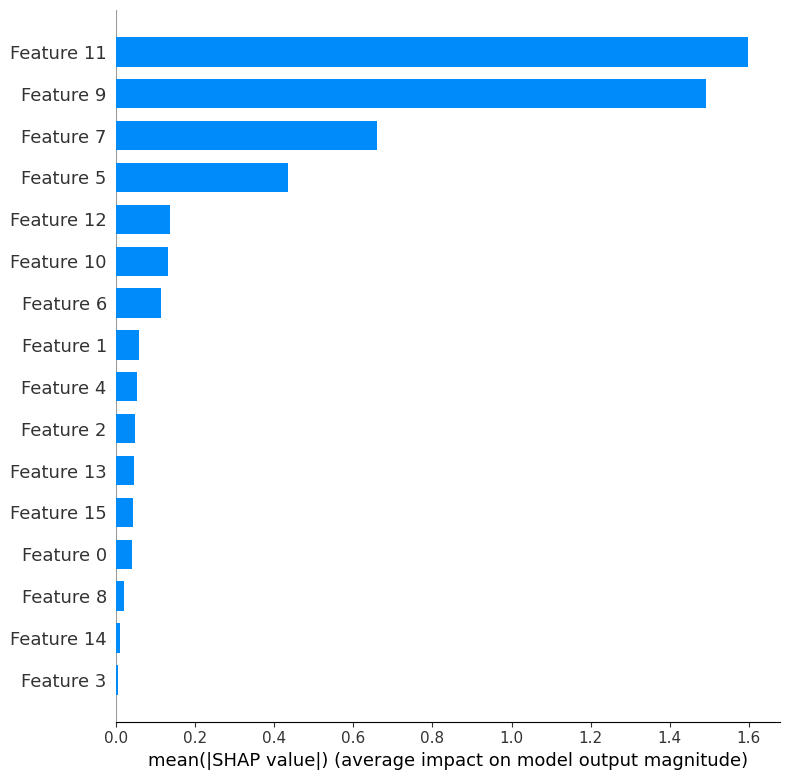

In [30]:
# Define your features and target variable
X = df.drop(' Protein (g) ', axis=1)
y = df[' Protein (g) ']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
mapper = DataFrameMapper([(X_train.columns, StandardScaler())])
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_test = mapper.transform(X_test)

# Fit a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(preprocessed_X_train, y_train)

# Create the SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(preprocessed_X_test)
X_test_array = X_test.to_numpy()
# Generate the summary bar plot
shap.summary_plot(shap_values, preprocessed_X_test, plot_type='bar')

In [31]:
ninth_feature_name = df.columns[11]
print("Feature 11 corresponds to:", ninth_feature_name)

Feature 11 corresponds to: Vitamin C (% DV)


According to the bar plot feature 11 , i.e. Vitamic C (% DV) the most important feature

# EXPLANATION

1.)

a.) Ordinary Least Squares (OLS) Regression Model:

The OLS regression model is fitted to predict the 'Protein (g)' content based on various nutritional information from a Starbucks dataset. The sm.OLS function from the statsmodels library is used, and an R-squared value of 0.984 is reported, indicating a high degree of fit.
The regression coefficients for each predictor variable, along with their p-values, are listed. For instance:
Calories: A coefficient of 0.0356, indicating that for each one-unit increase in calories, the protein content is expected to increase by 0.0356 grams, assuming all other variables are held constant. This coefficient is statistically significant (p < 0.000).
Total Fat (g): A negative coefficient of -0.9889 suggests that an increase in total fat is associated with a decrease in protein content, and this relationship is significant (p < 0.000).
Calcium (% DV): With a coefficient of 21.9395, this indicates a strong and positive association with the protein content, highly significant (p < 0.000).
Some variables, such as 'Vitamin C (% DV)' and 'Bevg_Prep', show no significant relationship with protein content (p > 0.05).

b.) Linear Regression Model with Pipeline:

Another linear regression model is mentioned as part of a pipeline that includes preprocessing steps (e.g., standard scaling). The training and testing mean absolute errors (MAEs) are reported for this model, but specific regression coefficients are not detailed in the provided snippets.
The emphasis is on the application of pipelines in preprocessing and model fitting rather than the interpretation of individual coefficients.
In summary, the document elaborates on the OLS regression results in detail, providing insights into how each nutritional factor influences the protein content in Starbucks' menu items. The second model, fitted via a pipeline, is discussed in terms of its predictive performance rather than the interpretation of regression coefficients.







2.)

On fitting a tree-based model, specifically a Random Forest Regressor, to the data. However, it does not provide a direct interpretation of the individual nodes within the trees of the Random Forest model. Instead, the focus is on the overall performance of the model and the importance of features based on the Random Forest's output.

To truly interpret the nodes of a tree within a Random Forest, one would need to visualize the trees and examine the conditions at each node. However, given the ensemble nature of Random Forests, where predictions are made by averaging the predictions of many trees, a single tree's interpretation might not represent the overall model's decision-making process. Instead, feature importance metrics are a more practical way to understand what drives the model's predictions at a higher level.

# Finding the best Model Using AutoML

We will use a AUTOML library called 'TPOT' to find the best Model

In [32]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop(' Protein (g) ', axis=1)
y = df[' Protein (g) ']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOT regressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

# Run the AutoML search
tpot.fit(X_train, y_train)

# Evaluate the model
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.5631655597743999

Generation 2 - Current best internal CV score: -0.5631655597743999

Generation 3 - Current best internal CV score: -0.5443261807582972

Generation 4 - Current best internal CV score: -0.5383115395711624

Generation 5 - Current best internal CV score: -0.5383115395711624

Best pipeline: RidgeCV(RidgeCV(input_matrix))
-0.5112468130246669


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


TPOT found is a Ridge Regression with Cross-Validation (denoted as RidgeCV in the output). The score provided appears to be the internal CV score that TPOT used to evaluate the performance of the models. This score is typically a negative mean squared error, with a higher (less negative) value indicating a better performing model.

The model's score improved slightly over the generations, settling on the RidgeCV model in the end. This suggests that for the Starbucks.csv dataset, with the target variable 'Protein (g)', Ridge Regression performed best.

# Inference on comparing the SHAP values with the model  interpretability methods.

4.) Comparing SHAP values to coefficients in linear models, both provide insights into feature importance but in different ways. Linear regression coefficients directly indicate how the target variable changes with a one-unit change in a predictor, assuming a linear relationship and holding other variables constant. In contrast, SHAP values can capture more complex, non-linear relationships and interactions between features, applicable to a wide range of models beyond just linear regression.

Overall, SHAP offers a more flexible and comprehensive approach to model interpretability, especially for complex models where traditional coefficients or feature importance scores do not fully capture the nuances of how input features affect predictions.

# Question and Answer

**==> ML DATA CLEANING AND FEATURE SELECTION**

Q1) **What is the question ?**

Ans) The main question was to prepare and analyze the data for machine learning, focusing on cleaning, exploring, and selecting features for predictive modeling.

Q2) **What did you do ?**

Ans)
--> Conducted Exploratory Data Analysis (EDA) on both categorical and continuous variables.

--> Plotted graphs for both dependent and independent variables to understand their likely distributions.

--> Analyzed important dependent variables using techniques like Select K-best, heat map, and feature correlation.

--> Calculated accuracy and confusion matrix using Random Forest Classifier and Logistic Regression.

--> Removed outliers at different percentages (1%, 5%, and 10%) and observed the impact on accuracy.

Q3) **How well did it work?**

Ans) The data cleaning and feature selection process provided insights into the distribution of variables and helped in identifying important features for modeling. The evaluation using different classifiers and outlier removal also gave an understanding of model performance under different scenarios.

Q4) **What did you learn?**

Ans)
--> The importance of exploring and cleaning data before modeling.
--> The impact of outliers on model accuracy.
--> The effectiveness of different feature selection techniques.



**==> AutoML**

Q1) **What is the question ?**

Ans) The question here was to explore and utilize AutoML for model training and selection.


Q2) **What did you do ?**

Ans)
--> Applied H2O AutoML to the dataset.

--> Displayed and examined the Leaderboard to compare various models.

--> Compared and examined different models generated by AutoML.

--> Selected the best model based on performance.

--> Applied regularization techniques(with and without regularization)


Q3) **How well did it work?**

Ans)
--> AutoML provided a quick and efficient way to explore multiple models and their performances.

-->The Leaderboard comparison and model examination allowed for an informed choice of the best-performing model.

--> Regularization was applied to enhance the chosen model's robustness.


Q4) **What did you learn?**

Ans)
--> The benefits of automated model selection and training.

--> The importance of regularization in model performance.


**==> Model Interpretability**

Q1) **What is the question ?**

Ans) The question in this case was to interpret the chosen model and understand the impact of features.

Q2) **What did you do ?**

Ans)
--> Fitted a tree-based model for interpretability.
Utilized Recursive Feature Elimination (RFE) for Shap Values.

--> Plotted a SHAP summary plot to interpret the model's behavior.


Q3) **How well did it work?**

Ans)
--> The tree-based model and SHAP values provided insights into feature importance and their impact on predictions.

--> The SHAP summary plot visually represented the contribution of each feature to the model's output.


Q4) **What did you learn?**

Ans)
--> The interpretability of machine learning models, especially through techniques like SHAP values.

--> How individual features contribute to the model's predictions.

**MIT License**

Copyright (c) 2024 pranav1414

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**References**

Dataset - https://www.kaggle.com/datasets/henryshan/starbucks/data

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

YT - Data Cleaning and EDA- Youtube

ML Content - https://machinelearningmastery.com/calculate-feature-importance-with-python/

Prof Starter notebook -
1) https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynbLinks

2) https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

3)  https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynbLinks


